<a href="https://colab.research.google.com/github/viiihbastos/googlecolabnotebooks/blob/main/Minera%C3%A7%C3%A3o_e_An%C3%A1lise_de_Dados_do_Facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mineração e Análise de Dados do Facebook

## Importação das bibliotecas

In [ ]:
!pip install facebook-sdk
#!pip install facebook-sdk 3.1.0

In [ ]:
import facebook
import requests
import pandas as pd
import numpy as np

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 13.2MB 303kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.express as px

## Obtenção de token temporário

In [ ]:
app_id = '441597433762958'
app_secret = '5445fa0a7344a33d86b22b8875abc28e'
# 1 hora
user_short_token = 'EAAGRoWosVI4BACZAkh3faqynaMSHCNm7hX33eLtubjCj26ttGfPbNEZA5nGZBmVaYvLjHyBrmqTpnD9VGZAynDduR7yz7DA4qBBJUxmdf5ZAsZBBmqZC5ZCLYGPwHxZCgrLMwE9MFDjTLypkntbTABIju5eZCkZBEHCZCcdHOpWp9zbSORhwyaDDyRqWexvXfETqNGqapW50HNEw4wZDZD'

In [ ]:
url = 'https://graph.facebook.com/oauth/access_token'

In [ ]:
parameters = {'grant_type': 'fb_exchange_token',
              'client_id': app_id,
              'client_secret': app_secret,
              'fb_exchange_token': user_short_token}

In [ ]:
response = requests.get(url, params=parameters)

In [ ]:
response

<Response [200]>

In [ ]:
response_json = response.json()
response_json

{'access_token': 'EAAGRoWosVI4BANJ8NiEOM417NH8uFEFPtdDmesPz9ZBXn8eNGNyLC3ZAkoXZBrjZA64lIc2h6Wxc4VgN7k0asLfQLwsOwckAJXkyD7eMA9ZC3NmWZAAeWnUDeolJ9A2xkzkcSPQ23ZBuPd4fzxTz2KhMMZAZB8TZCY4xidqALdAPNEsdMKYR0E3zkj',
 'expires_in': 5182196,
 'token_type': 'bearer'}

In [ ]:
# 2 meses
user_long_token = response_json['access_token']
user_long_token

'EAAGRoWosVI4BANJ8NiEOM417NH8uFEFPtdDmesPz9ZBXn8eNGNyLC3ZAkoXZBrjZA64lIc2h6Wxc4VgN7k0asLfQLwsOwckAJXkyD7eMA9ZC3NmWZAAeWnUDeolJ9A2xkzkcSPQ23ZBuPd4fzxTz2KhMMZAZB8TZCY4xidqALdAPNEsdMKYR0E3zkj'

## Obtenção de token permanente

In [ ]:
graph = facebook.GraphAPI(access_token=user_long_token, version='3.1')

In [ ]:
dados_pagina = graph.get_object('/me/accounts')
dados_pagina

{'data': [{'access_token': 'EAAGRoWosVI4BAMW7sI3OfUknlmeoim9LnuBZCrzpqzsrDebMjC3V9h54kqzjT3A2H2oJRZBEZC75vNWKifZBZBUyeFLBV2yCZCsia0bOkAUZC5oIsCwrE5J3cO3ZBeJBNfCMnvLd16byNZAC9U8EfqfmP3QPRnfBY2fBMbZBz0ZCZANQayqtbjouGzZBGvZC3SnC9x1M0ZD',
   'category': 'Tutor/professor',
   'category_list': [{'id': '145296352197250', 'name': 'Tutor/Professor'}],
   'id': '228782997490446',
   'name': 'IA Expert Academy - Inteligência Artificial',
   'tasks': ['ANALYZE',
    'ADVERTISE',
    'MESSAGING',
    'MODERATE',
    'CREATE_CONTENT',
    'MANAGE']},
  {'access_token': 'EAAGRoWosVI4BAA727bnjxpZCaqSCH4Nol4qzCh9mnAW2laPdbX3K8ZArxrSRJONqeS9c38mMbFHBhsduHFFcd5zLZB39X0yR3ePFnztxVm6KVoNopwLeUiOsZB0L3BwcJ3IUfE6Ux89MYUolKgBtaVCilh0lsPZCzPPcrwHPr4uYCDLbhNHue0GJCW3ZCr6L4ZD',
   'category': 'Comércio local',
   'category_list': [{'id': '2500', 'name': 'Negócio local'}],
   'id': '945388505603058',
   'name': 'IA Expert',
   'tasks': ['ANALYZE',
    'ADVERTISE',
    'MESSAGING',
    'MODERATE',
    'CREATE_CONT

In [ ]:
permanent_page_token = dados_pagina['data'][0]['access_token']
permanent_page_token

'EAAGRoWosVI4BAMW7sI3OfUknlmeoim9LnuBZCrzpqzsrDebMjC3V9h54kqzjT3A2H2oJRZBEZC75vNWKifZBZBUyeFLBV2yCZCsia0bOkAUZC5oIsCwrE5J3cO3ZBeJBNfCMnvLd16byNZAC9U8EfqfmP3QPRnfBY2fBMbZBz0ZCZANQayqtbjouGzZBGvZC3SnC9x1M0ZD'

In [ ]:
page_id = dados_pagina['data'][0]['id']
page_id

'228782997490446'

In [ ]:
permanent_page_token = 'EAAGRoWosVI4BAMW7sI3OfUknlmeoim9LnuBZCrzpqzsrDebMjC3V9h54kqzjT3A2H2oJRZBEZC75vNWKifZBZBUyeFLBV2yCZCsia0bOkAUZC5oIsCwrE5J3cO3ZBeJBNfCMnvLd16byNZAC9U8EfqfmP3QPRnfBY2fBMbZBz0ZCZANQayqtbjouGzZBGvZC3SnC9x1M0ZD'
page_id = '228782997490446'

## Informações básicas da página

- Documentação: https://developers.facebook.com/docs/graph-api/reference/v10.0/insights

In [ ]:
graph = facebook.GraphAPI(access_token=permanent_page_token, version = '3.1')

In [ ]:
graph.get_object(id=page_id, fields='category')

{'category': 'Tutor/professor', 'id': '228782997490446'}

In [ ]:
graph.get_object(id=page_id, fields='name')

{'id': '228782997490446',
 'name': 'IA Expert Academy - Inteligência Artificial'}

In [ ]:
graph.get_object(id=page_id)

{'id': '228782997490446',
 'name': 'IA Expert Academy - Inteligência Artificial'}

In [ ]:
graph.get_object(id=page_id, fields='about, website')

{'about': 'O objetivo é trazer conteúdo sobre Inteligência Artificial e como esses conceitos podem ser aplicados na prática por profissionais de TI',
 'id': '228782997490446',
 'website': 'http://www.iaexpert.com.br'}

In [ ]:
graph.get_object(id=page_id, fields='fan_count')

{'fan_count': 5166, 'id': '228782997490446'}

In [ ]:
graph.get_object(id=page_id, fields='birthday')

{'birthday': '05/19/2016', 'id': '228782997490446'}

In [ ]:
graph.get_object(id=page_id, fields='engagement')

{'engagement': {'count': 5166,
  'social_sentence': '5,1\xa0mil pessoas curtiram isso.'},
 'id': '228782997490446'}

In [ ]:
graph.get_object(id=page_id, fields='followers_count')

{'followers_count': 5470, 'id': '228782997490446'}

## Informações sobre os fãs da página

### Fãs por data

In [ ]:
graph.get_connections(id = page_id, connection_name='insights', metric='page_fans')

{'data': [{'description': 'Lifetime: The total number of people who have liked your Page. (Unique Users)',
   'id': '228782997490446/insights/page_fans/day',
   'name': 'page_fans',
   'period': 'day',
   'title': 'Lifetime Total Likes',
   'values': [{'end_time': '2021-03-20T07:00:00+0000', 'value': 5160},
    {'end_time': '2021-03-21T07:00:00+0000', 'value': 5161}]}],
 'paging': {'next': 'https://graph.facebook.com/v10.0/228782997490446/insights?access_token=EAAGRoWosVI4BAMW7sI3OfUknlmeoim9LnuBZCrzpqzsrDebMjC3V9h54kqzjT3A2H2oJRZBEZC75vNWKifZBZBUyeFLBV2yCZCsia0bOkAUZC5oIsCwrE5J3cO3ZBeJBNfCMnvLd16byNZAC9U8EfqfmP3QPRnfBY2fBMbZBz0ZCZANQayqtbjouGzZBGvZC3SnC9x1M0ZD&metric=page_fans&since=1616310000&until=1616482800',
  'previous': 'https://graph.facebook.com/v10.0/228782997490446/insights?access_token=EAAGRoWosVI4BAMW7sI3OfUknlmeoim9LnuBZCrzpqzsrDebMjC3V9h54kqzjT3A2H2oJRZBEZC75vNWKifZBZBUyeFLBV2yCZCsia0bOkAUZC5oIsCwrE5J3cO3ZBeJBNfCMnvLd16byNZAC9U8EfqfmP3QPRnfBY2fBMbZBz0ZCZANQayqtbjouGzZBGv

In [ ]:
fas = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans',
                            since = '2020-12-15', until = '2021-03-18')

In [ ]:
type(fas), type(fas['data'])

(dict, list)

In [ ]:
type(fas['data'][0]['values'])

list

In [ ]:
fas

{'data': [{'description': 'Lifetime: The total number of people who have liked your Page. (Unique Users)',
   'id': '228782997490446/insights/page_fans/day',
   'name': 'page_fans',
   'period': 'day',
   'title': 'Lifetime Total Likes',
   'values': [{'end_time': '2020-12-16T08:00:00+0000', 'value': 5114},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 5115},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 5119},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 5121},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 5122},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 5123},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 5124},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 5125},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 5121},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 5122},
    {'end_time': '2020-12-26T08:00:00+0000', 'value': 5121},
    {'end_time': '2020-12-27T08:00:00+0000', 'value': 5121},
    {'end_time': '20

In [ ]:
dataframe_facebook = pd.DataFrame(fas['data'][0]['values'])
dataframe_facebook.rename(columns={'value': 'numero fas', 'end_time': 'data'}, inplace=True)
dataframe_facebook['data'] = pd.to_datetime(dataframe_facebook['data'])
dataframe_facebook['data'] = dataframe_facebook['data'].dt.strftime('%Y-%m-%d')
dataframe_facebook

,numero fas,data
0,5114,2020-12-16
1,5115,2020-12-17
2,5119,2020-12-18
3,5121,2020-12-19
4,5122,2020-12-20
...,...,...
87,5154,2021-03-13
88,5155,2021-03-14
89,5154,2021-03-15
90,5155,2021-03-16


In [ ]:
grafico = px.line(dataframe_facebook, x = 'data', y = 'numero fas', title = 'Número de fãs por dia')
grafico.show()

### Fãs por idioma

In [ ]:
fas_idioma = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_fans_locale',
                                   since = '2021-03-18', until = '2021-03-18')
fas_idioma

{'data': [{'description': 'Lifetime: Aggregated language data about the people who like your Page based on the default language setting selected when accessing Facebook. (Unique Users)',
   'id': '228782997490446/insights/page_fans_locale/day',
   'name': 'page_fans_locale',
   'period': 'day',
   'title': 'Lifetime Likes by Language',
   'values': [{'end_time': '2021-03-17T07:00:00+0000',
     'value': {'ar_AR': 1,
      'de_DE': 2,
      'en_GB': 25,
      'en_PI': 1,
      'en_US': 268,
      'es_ES': 16,
      'es_LA': 41,
      'fr_FR': 14,
      'hi_IN': 1,
      'it_IT': 2,
      'nb_NO': 1,
      'pt_BR': 4568,
      'pt_PT': 214,
      'vi_VN': 2}}]}],
 'paging': {'next': 'https://graph.facebook.com/v10.0/228782997490446/insights?access_token=EAAGRoWosVI4BAMW7sI3OfUknlmeoim9LnuBZCrzpqzsrDebMjC3V9h54kqzjT3A2H2oJRZBEZC75vNWKifZBZBUyeFLBV2yCZCsia0bOkAUZC5oIsCwrE5J3cO3ZBeJBNfCMnvLd16byNZAC9U8EfqfmP3QPRnfBY2fBMbZBz0ZCZANQayqtbjouGzZBGvZC3SnC9x1M0ZD&since=1615964400&until=1616050800

In [ ]:
fas_idioma['data'][0]['values'][0]['value']

{'ar_AR': 1,
 'de_DE': 2,
 'en_GB': 25,
 'en_PI': 1,
 'en_US': 268,
 'es_ES': 16,
 'es_LA': 41,
 'fr_FR': 14,
 'hi_IN': 1,
 'it_IT': 2,
 'nb_NO': 1,
 'pt_BR': 4568,
 'pt_PT': 214,
 'vi_VN': 2}

In [ ]:
fas_idioma_df = pd.DataFrame.from_dict(fas_idioma['data'][0]['values'][0]['value'], orient='index')
fas_idioma_df.reset_index(inplace=True)
fas_idioma_df.rename(columns={'index': 'idioma', 0: 'quantidade'}, inplace=True)
fas_idioma_df

,idioma,quantidade
0,it_IT,2
1,es_LA,41
2,hi_IN,1
3,vi_VN,2
4,pt_BR,4568
5,en_PI,1
6,fr_FR,14
7,de_DE,2
8,nb_NO,1
9,ar_AR,1


In [ ]:
grafico = px.bar(fas_idioma_df, x='idioma', y='quantidade', title='Fãs por idioma')
grafico.show()

### Fãs por cidade

In [ ]:
fas_cidade = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans_city',
                                   since = '2021-03-18', until='2021-03-18')
fas_cidade

{'data': [{'description': 'Lifetime: Aggregated Facebook location data, sorted by city (top 50), about the people who like your Page. (Unique Users)',
   'id': '228782997490446/insights/page_fans_city/day',
   'name': 'page_fans_city',
   'period': 'day',
   'title': 'Lifetime Likes by City',
   'values': [{'end_time': '2021-03-17T07:00:00+0000',
     'value': {'Barueri, SP': 16,
      'Bauru, SP': 18,
      'Belo Horizonte, MG': 92,
      'Belém, PA': 49,
      'Brasília, DF': 117,
      'Campina Grande, PB': 21,
      'Campinas, SP': 67,
      'Campo Grande, MS': 35,
      'Canoinhas, SC': 16,
      'Cuiabá, MT': 16,
      'Curitiba, PR': 103,
      'Dois Vizinhos, PR': 18,
      'Florianópolis, SC': 54,
      'Fortaleza, CE': 101,
      'Foz do Iguaçu, PR': 16,
      'Francisco Beltrão, PR': 34,
      'Goiânia, GO': 68,
      'Guarulhos, SP': 29,
      'Joinville, SC': 33,
      'João Pessoa, PB': 29,
      'Juiz de Fora, MG': 21,
      'Londrina, PR': 28,
      'Luanda, Angola': 21

In [ ]:
fas_cidade['data'][0]['values'][0]['value']

{'Barueri, SP': 16,
 'Bauru, SP': 18,
 'Belo Horizonte, MG': 92,
 'Belém, PA': 49,
 'Brasília, DF': 117,
 'Campina Grande, PB': 21,
 'Campinas, SP': 67,
 'Campo Grande, MS': 35,
 'Canoinhas, SC': 16,
 'Cuiabá, MT': 16,
 'Curitiba, PR': 103,
 'Dois Vizinhos, PR': 18,
 'Florianópolis, SC': 54,
 'Fortaleza, CE': 101,
 'Foz do Iguaçu, PR': 16,
 'Francisco Beltrão, PR': 34,
 'Goiânia, GO': 68,
 'Guarulhos, SP': 29,
 'Joinville, SC': 33,
 'João Pessoa, PB': 29,
 'Juiz de Fora, MG': 21,
 'Londrina, PR': 28,
 'Luanda, Angola': 21,
 'Maceió, AL': 32,
 'Manaus, AM': 97,
 'Maringá, PR': 25,
 'Natal, RN': 36,
 'Osasco, SP': 26,
 'Pato Branco, PR': 17,
 'Porto Alegre, RS': 74,
 'Pôrto União, SC': 36,
 'Recife, PE': 75,
 'Ribeirão Preto, SP': 18,
 'Rio de Janeiro, RJ': 223,
 'Salvador, BA': 58,
 'Santo André, SP': 24,
 'Serra, ES': 15,
 'Sorocaba, SP': 33,
 'São Bernardo do Campo, SP': 19,
 'São José dos Campos, SP': 24,
 'São Luís, MA': 52,
 'São Paulo, SP': 483,
 'Teresina, PI': 26,
 'Uberlândia, 

In [ ]:
fas_cidade_df = pd.DataFrame.from_dict(fas_cidade['data'][0]['values'][0]['value'], orient='index')
fas_cidade_df.reset_index(inplace=True)
fas_cidade_df.rename(columns={'index': 'cidade', 0: 'quantidade'}, inplace=True)
fas_cidade_df

,cidade,quantidade
0,"Serra, ES",15
1,"Cuiabá, MT",16
2,"Canoinhas, SC",16
3,"Barueri, SP",16
4,"Foz do Iguaçu, PR",16
5,"Pato Branco, PR",17
6,"Ribeirão Preto, SP",18
7,"Dois Vizinhos, PR",18
8,"Bauru, SP",18
9,"São Bernardo do Campo, SP",19


In [ ]:
grafico = px.bar(fas_cidade_df, x = 'cidade', y='quantidade', title = 'Fãs por cidade')
grafico.show()

In [ ]:
grafico = px.treemap(fas_cidade_df, path = ['cidade', 'quantidade'])
grafico

### Fãs por país

In [ ]:
fas_pais = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans_country',
                                 since = '2021-03-18', until = '2021-03-18')
fas_pais

{'data': [{'description': 'Lifetime: Aggregated Facebook location data, sorted by country (top 50), about the people who like your Page. (Unique Users)',
   'id': '228782997490446/insights/page_fans_country/day',
   'name': 'page_fans_country',
   'period': 'day',
   'title': 'Lifetime Likes by Country',
   'values': [{'end_time': '2021-03-17T07:00:00+0000',
     'value': {'AO': 26,
      'AR': 1,
      'AU': 4,
      'BE': 3,
      'BO': 3,
      'BR': 4922,
      'CA': 7,
      'CH': 1,
      'CL': 3,
      'CO': 8,
      'CV': 5,
      'DE': 9,
      'EC': 5,
      'EE': 1,
      'ES': 1,
      'FR': 10,
      'GB': 5,
      'GT': 1,
      'IE': 5,
      'IN': 5,
      'IT': 1,
      'JP': 3,
      'MT': 1,
      'MX': 6,
      'MY': 1,
      'MZ': 4,
      'NG': 1,
      'NL': 3,
      'NO': 1,
      'NZ': 1,
      'PE': 19,
      'PK': 1,
      'PL': 1,
      'PT': 66,
      'PY': 3,
      'RO': 1,
      'RU': 1,
      'SN': 1,
      'TH': 1,
      'TL': 1,
      'TR': 1,
      'T

In [ ]:
fas_pais['data'][0]['values'][0]['value']

{'AO': 26,
 'AR': 1,
 'AU': 4,
 'BE': 3,
 'BO': 3,
 'BR': 4922,
 'CA': 7,
 'CH': 1,
 'CL': 3,
 'CO': 8,
 'CV': 5,
 'DE': 9,
 'EC': 5,
 'EE': 1,
 'ES': 1,
 'FR': 10,
 'GB': 5,
 'GT': 1,
 'IE': 5,
 'IN': 5,
 'IT': 1,
 'JP': 3,
 'MT': 1,
 'MX': 6,
 'MY': 1,
 'MZ': 4,
 'NG': 1,
 'NL': 3,
 'NO': 1,
 'NZ': 1,
 'PE': 19,
 'PK': 1,
 'PL': 1,
 'PT': 66,
 'PY': 3,
 'RO': 1,
 'RU': 1,
 'SN': 1,
 'TH': 1,
 'TL': 1,
 'TR': 1,
 'TW': 1,
 'UG': 1,
 'US': 7,
 'VN': 3}

In [ ]:
fas_pais_df = pd.DataFrame.from_dict(fas_pais['data'][0]['values'][0]['value'], orient='index')
fas_pais_df.reset_index(inplace=True)
fas_pais_df.rename(columns={"index": "pais", 0: "quantidade"}, inplace=True)
fas_pais_df

,pais,quantidade
0,NO,1
1,DE,9
2,RU,1
3,TW,1
4,BE,3
5,PT,66
6,JP,3
7,PY,3
8,NZ,1
9,FR,10


In [ ]:
grafico = px.bar(fas_pais_df, x="pais", y="quantidade", title = 'Fãs por país')
grafico.show()

In [ ]:
grafico = px.treemap(fas_pais_df, path=['pais', 'quantidade'])
grafico

### Fãs por idade e gênero

In [ ]:
fas_idade_genero = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans_gender_age',
                                         since = '2021-03-18', until = '2021-03-18')
fas_idade_genero

{'data': [{'description': 'Lifetime: Aggregated demographic data about the people who like your Page based on the age and gender information they provide in their user profiles. (Unique Users)',
   'id': '228782997490446/insights/page_fans_gender_age/day',
   'name': 'page_fans_gender_age',
   'period': 'day',
   'title': 'Lifetime Likes by Gender and Age',
   'values': [{'end_time': '2021-03-17T07:00:00+0000',
     'value': {'F.13-17': 7,
      'F.18-24': 280,
      'F.25-34': 311,
      'F.35-44': 212,
      'F.45-54': 74,
      'F.55-64': 25,
      'F.65+': 9,
      'M.13-17': 11,
      'M.18-24': 985,
      'M.25-34': 1795,
      'M.35-44': 1035,
      'M.45-54': 292,
      'M.55-64': 80,
      'M.65+': 31,
      'U.18-24': 2,
      'U.25-34': 2,
      'U.35-44': 2,
      'U.45-54': 3}}]}],
 'paging': {'next': 'https://graph.facebook.com/v10.0/228782997490446/insights?access_token=EAAGRoWosVI4BAMW7sI3OfUknlmeoim9LnuBZCrzpqzsrDebMjC3V9h54kqzjT3A2H2oJRZBEZC75vNWKifZBZBUyeFLBV2yCZCsia

In [ ]:
fas_idade_genero['data'][0]['values'][0]['value']

{'F.13-17': 7,
 'F.18-24': 280,
 'F.25-34': 311,
 'F.35-44': 212,
 'F.45-54': 74,
 'F.55-64': 25,
 'F.65+': 9,
 'M.13-17': 11,
 'M.18-24': 985,
 'M.25-34': 1795,
 'M.35-44': 1035,
 'M.45-54': 292,
 'M.55-64': 80,
 'M.65+': 31,
 'U.18-24': 2,
 'U.25-34': 2,
 'U.35-44': 2,
 'U.45-54': 3}

In [ ]:
fas_idade_genero_df = pd.DataFrame.from_dict(fas_idade_genero['data'][0]['values'][0]['value'], orient='index')
fas_idade_genero_df.reset_index(inplace=True)
fas_idade_genero_df.rename(columns={"index": "idade genero", 0: "quantidade"}, inplace=True)
fas_idade_genero_df

,idade genero,quantidade
0,M.55-64,80
1,U.35-44,2
2,F.45-54,74
3,M.18-24,985
4,M.35-44,1035
5,F.25-34,311
6,U.18-24,2
7,M.25-34,1795
8,U.45-54,3
9,F.13-17,7


In [ ]:
grafico = px.bar(fas_idade_genero_df, x="idade genero", y="quantidade", title = 'Fãs por idade e gênero')
grafico.show()

### Curtidas e descurtidas da página

In [ ]:
curtidas = graph.get_connections(id=page_id, connection_name='insights', metric='page_fan_adds',
                                 since = '2020-12-15', until='2021-03-18')
curtidas

{'data': [{'description': 'Daily: The number of new people who have liked your Page (Total Count)',
   'id': '228782997490446/insights/page_fan_adds/day',
   'name': 'page_fan_adds',
   'period': 'day',
   'title': 'Daily New Likes',
   'values': [{'end_time': '2020-12-16T08:00:00+0000', 'value': 4},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 1},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 4},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 2},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 1},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 2},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 1},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 1},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 1},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 2},
    {'end_time': '2020-12-26T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-27T08:00:00+0000', 'value': 1},
    {'end_time': '2020-12-28T08:00:00+0000', 'value': 1},
  

In [ ]:
numero_curtidas = []
for i in curtidas['data'][0]['values']:
  #print(i['value'])
  numero_curtidas.append(i['value'])
numero_curtidas = np.array(numero_curtidas)

In [ ]:
numero_curtidas

array([ 4,  1,  4,  2,  1,  2,  1,  1,  1,  2,  0,  1,  1,  0,  2,  1,  2,
        2,  3,  0,  1,  3,  4,  4,  2,  0,  1,  2,  3,  1,  1,  2,  0,  3,
        3,  0,  2,  2,  2,  1,  1,  2,  1,  0,  1,  0,  3,  1,  0,  1,  0,
        1,  0,  0,  0,  0,  2,  0,  1,  1,  0,  3,  1,  1,  1,  1,  1,  0,
       11,  3,  2,  3,  0,  0,  0,  1,  2,  2,  1,  0,  2,  0,  0,  2,  2,
        1,  3,  3,  2,  2,  1,  2])

In [ ]:
descurtidas = graph.get_connections(id=page_id, connection_name='insights', metric='page_fan_removes',
                                    since = '2020-12-15', until = '2021-03-18')
descurtidas

{'data': [{'description': 'Daily: The number of Unlikes of your Page (Total Count)',
   'id': '228782997490446/insights/page_fan_removes/day',
   'name': 'page_fan_removes',
   'period': 'day',
   'title': 'Daily Unlikes',
   'values': [{'end_time': '2020-12-16T08:00:00+0000', 'value': 1},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 4},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 1},
    {'end_time': '2020-12-26T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-27T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-28T08:00:00+0000', 'value': 0},
    {'end_tim

In [ ]:
numero_descurtidas = []
for i in descurtidas['data'][0]['values']:
  numero_descurtidas.append(i['value'])
numero_descurtidas = np.array(numero_descurtidas)

In [ ]:
numero_descurtidas

array([1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2,
       0, 0, 3, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 1, 0, 1, 4, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1,
       1, 3, 0, 1])

In [ ]:
len(dataframe_facebook), len(numero_curtidas), len(numero_descurtidas)

(92, 92, 92)

In [ ]:
dataframe_facebook['numero curtidas'] = numero_curtidas
dataframe_facebook['numero descurtidas'] = numero_descurtidas
dataframe_facebook

,numero fas,data,numero curtidas,numero descurtidas
0,5114,2020-12-16,4,1
1,5115,2020-12-17,1,0
2,5119,2020-12-18,4,0
3,5121,2020-12-19,2,0
4,5122,2020-12-20,1,0
...,...,...,...,...
87,5154,2021-03-13,3,1
88,5155,2021-03-14,2,1
89,5154,2021-03-15,2,3
90,5155,2021-03-16,1,0


In [ ]:
dataframe_facebook.describe()

,numero fas,numero curtidas,numero descurtidas
count,92.000000,92.000000,92.000000
mean,5137.271739,1.478261,0.804348
std,11.648802,1.500756,0.986047
min,5114.000000,0.000000,0.000000
25%,5129.000000,0.750000,0.000000
50%,5138.500000,1.000000,0.000000
75%,5146.250000,2.000000,1.250000
max,5156.000000,11.000000,4.000000


In [ ]:
dataframe_facebook[dataframe_facebook['numero curtidas'] == 11]

,numero fas,data,numero curtidas,numero descurtidas
68,5147,2021-02-22,11,0


In [ ]:
dataframe_facebook[dataframe_facebook['numero descurtidas'] == 4]

,numero fas,data,numero curtidas,numero descurtidas
8,5121,2020-12-24,1,4
75,5150,2021-03-01,1,4


In [ ]:
grafico = px.line(title = 'Curtidas x descurtidas')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero curtidas'], name = 'Curtidas')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero descurtidas'], name = 'Descurtidas')
grafico.show()

In [ ]:
dataframe_facebook['numero curtidas'].sum(), dataframe_facebook['numero descurtidas'].sum()

(136, 74)

In [ ]:
136 + 74, (74 / 210) * 100

(210, 35.23809523809524)

In [ ]:
descurtidas_tipo = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans_by_unlike_source_unique',
                                         since = '2020-12-15', until = '2021-03-18')
descurtidas_tipo

{'data': [{'description': 'Daily: The number of people who unliked your Page, broken down by the most common places where people can unlike your Page. (Unique Users)',
   'id': '228782997490446/insights/page_fans_by_unlike_source_unique/day',
   'name': 'page_fans_by_unlike_source_unique',
   'period': 'day',
   'title': 'Daily Unlike Sources',
   'values': [{'end_time': '2020-12-16T08:00:00+0000',
     'value': {'Unlikes from Page, Posts, or News Feed': 1}},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-24T08:00:00+0000',
     'value': {'Deactivated or Memorialized Account Removals': 2,
      'Unlik

In [ ]:
motivos = {}
for i in descurtidas_tipo['data'][0]['values']:
  #print(i)
  if i['value']:
    #print(i)
    #print('---------')
    #print(i['value'])
    for k, v in i['value'].items():
      #print(k,v)
      if k in motivos:
        motivos[k] += v
      else:
        motivos[k] = v

In [ ]:
motivos

{'Deactivated or Memorialized Account Removals': 43,
 'Other': 10,
 'Suspicious Account Removals': 11,
 'Unlikes from Page, Posts, or News Feed': 9}

In [ ]:
motivos_df = pd.DataFrame.from_dict(motivos, orient='index')
motivos_df.reset_index(inplace=True)
motivos_df.rename(columns={'index': 'motivo', 0: 'quantidade'}, inplace=True)
motivos_df

,motivo,quantidade
0,"Unlikes from Page, Posts, or News Feed",9
1,Deactivated or Memorialized Account Removals,43
2,Other,10
3,Suspicious Account Removals,11


In [ ]:
grafico = px.bar(motivos_df, x = 'motivo', y = 'quantidade', title = 'Motivos das descurtidas na página')
grafico.show()

In [ ]:
136 + 74, (19 / 210) * 100

(210, 9.047619047619047)

## Visualizações, cliques, engajamento e impressões



### Visualizações de abas

In [ ]:
visualizacao_abas = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_tab_views_login_top_unique',
                                          since = '2020-12-14', until = '2021-03-17')
visualizacao_abas

{'data': [{'description': 'Daily: Tabs on your Page that were viewed when logged-in users visited your Page. (Unique Users)',
   'id': '228782997490446/insights/page_tab_views_login_top_unique/day',
   'name': 'page_tab_views_login_top_unique',
   'period': 'day',
   'title': 'Daily Logged-in Tab Views',
   'values': [{'end_time': '2020-12-15T08:00:00+0000',
     'value': {'home': 4, 'tab_home': 3}},
    {'end_time': '2020-12-16T08:00:00+0000',
     'value': {'home': 9, 'posts': 1, 'profile_home': 2, 'tab_home': 13}},
    {'end_time': '2020-12-17T08:00:00+0000',
     'value': {'home': 4, 'tab_home': 6}},
    {'end_time': '2020-12-18T08:00:00+0000',
     'value': {'home': 4, 'profile_home': 2, 'tab_home': 5}},
    {'end_time': '2020-12-19T08:00:00+0000',
     'value': {'home': 6, 'profile_home': 1, 'tab_home': 3}},
    {'end_time': '2020-12-20T08:00:00+0000',
     'value': {'home': 4, 'videos': 1}},
    {'end_time': '2020-12-21T08:00:00+0000',
     'value': {'home': 5, 'tab_about': 1, '

In [ ]:
fonte_visualizacao = {}
for i in visualizacao_abas['data'][0]['values']:
  #print(i)
  if i['value']:
    for k, v in i['value'].items():
      #print(k,v)
      if k in fonte_visualizacao:
        fonte_visualizacao[k] += v
      else:
        fonte_visualizacao[k] = v

In [ ]:
fonte_visualizacao

{'about': 1,
 'community': 1,
 'home': 594,
 'photos': 1,
 'posts': 7,
 'profile_home': 34,
 'profile_posts': 1,
 'tab_about': 4,
 'tab_home': 256,
 'tab_promotions': 2,
 'tab_videos': 3,
 'videos': 5}

In [ ]:
fonte_visualizacao_df = pd.DataFrame.from_dict(fonte_visualizacao, orient='index')
fonte_visualizacao_df.reset_index(inplace=True)
fonte_visualizacao_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_visualizacao_df

,fonte,quantidade
0,tab_home,256
1,home,594
2,profile_home,34
3,posts,7
4,videos,5
5,tab_about,4
6,profile_posts,1
7,tab_videos,3
8,tab_promotions,2
9,about,1


In [ ]:
grafico = px.bar(fonte_visualizacao_df, x='fonte', y="quantidade", title = 'Visualização por abas')
grafico.show()

### Cliques nas informações de contato e chamada para ação

In [ ]:
cliques_contato_acao = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_total_actions',
                                             since = '2020-12-14', until = '2021-03-17')
cliques_contato_acao

{'data': [{'description': "Daily: The number of clicks on your Page's contact info and call-to-action button.",
   'id': '228782997490446/insights/page_total_actions/day',
   'name': 'page_total_actions',
   'period': 'day',
   'title': 'Daily Total: total action count per Page',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 1},
    {'end_time': '2020-12-26T08:00:00+0000', 'value': 0},
    {'end_tim

In [ ]:
numero_cliques_contato_acao = []
for i in cliques_contato_acao['data'][0]['values']:
  #print(i)
  numero_cliques_contato_acao.append(i['value'])
numero_cliques_contato_acao = np.array(numero_cliques_contato_acao)

In [ ]:
numero_cliques_contato_acao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1])

In [ ]:
len(numero_cliques_contato_acao)

92

In [ ]:
dataframe_facebook['numero cliques contato acao'] = numero_cliques_contato_acao
dataframe_facebook

,numero fas,data,numero curtidas,numero descurtidas,numero cliques contato acao
0,5114,2020-12-16,4,1,0
1,5115,2020-12-17,1,0,0
2,5119,2020-12-18,4,0,0
3,5121,2020-12-19,2,0,0
4,5122,2020-12-20,1,0,0
...,...,...,...,...,...
87,5154,2021-03-13,3,1,1
88,5155,2021-03-14,2,1,0
89,5154,2021-03-15,2,3,1
90,5155,2021-03-16,1,0,0


In [ ]:
1 / 0.14

7.142857142857142

In [ ]:
dataframe_facebook['numero cliques contato acao'].describe()

count    92.000000
mean      0.141304
std       0.380327
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: numero cliques contato acao, dtype: float64

In [ ]:
grafico = px.line(dataframe_facebook, x="data", y="numero cliques contato acao", title = 'Número de cliques em contato e link para ação')
grafico.show()

### Cliques em como chegar

In [ ]:
graph.get_connections(id=page_id, connection_name='insights', metric='page_get_directions_clicks_logged_in_unique')

{'data': [{'description': 'Daily: Total get direction click count per Page  (Unique Users)',
   'id': '228782997490446/insights/page_get_directions_clicks_logged_in_unique/day',
   'name': 'page_get_directions_clicks_logged_in_unique',
   'period': 'day',
   'title': 'Daily Total get direction click count per Page',
   'values': [{'end_time': '2021-03-19T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-20T07:00:00+0000', 'value': 0}]},
  {'description': 'Weekly: Total get direction click count per Page (Unique Users)',
   'id': '228782997490446/insights/page_get_directions_clicks_logged_in_unique/week',
   'name': 'page_get_directions_clicks_logged_in_unique',
   'period': 'week',
   'title': 'Weekly Total get direction click count per Page',
   'values': [{'end_time': '2021-03-19T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-20T07:00:00+0000', 'value': 0}]},
  {'description': '28 Days: Total get direction click count per Page (Unique Users)',
   'id': '228782997490446/i

### Engajamento na página - número de cliques

In [ ]:
engajamento = graph.get_connections(id=page_id, connection_name='insights', metric='page_engaged_users',
                                    since = '2020-12-14', until = '2021-03-17')
engajamento

{'data': [{'description': 'Daily: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
   'id': '228782997490446/insights/page_engaged_users/day',
   'name': 'page_engaged_users',
   'period': 'day',
   'title': 'Daily Page Engaged Users',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 85},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 141},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 98},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 103},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 93},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 110},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 103},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 100},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 37},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 62},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 91},
    {'end_time': '2020-12-26T08:00:

In [ ]:
engajamento_cliques = []
for i in engajamento['data'][0]['values']:
  engajamento_cliques.append(i['value'])
engajamento_cliques = np.array(engajamento_cliques)

In [ ]:
engajamento_cliques

array([ 85, 141,  98, 103,  93, 110, 103, 100,  37,  62,  91,  15,   4,
         3,  13,  28,  18,   8,  12,   6,   5,   8,  11,   8,  85,  96,
        93,  90,  56,  71,  66,  89, 110,  90,  44, 275, 380, 264, 391,
       265, 184, 182, 177, 198, 217, 211, 189, 251, 135,  32,  42,  49,
        43,  27,  10,   1, 213, 199, 235, 273, 269, 244, 281, 328, 283,
       307, 258, 227, 260, 340, 299, 234, 307, 276, 204, 178, 137, 137,
       138, 150, 119, 137,  97,  96, 115, 117, 105, 104, 129, 133, 127,
       166])

In [ ]:
len(engajamento_cliques)

92

In [ ]:
dataframe_facebook['numero cliques engajamento'] = engajamento_cliques
dataframe_facebook

,numero fas,data,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento
0,5114,2020-12-16,4,1,0,85
1,5115,2020-12-17,1,0,0,141
2,5119,2020-12-18,4,0,0,98
3,5121,2020-12-19,2,0,0,103
4,5122,2020-12-20,1,0,0,93
...,...,...,...,...,...,...
87,5154,2021-03-13,3,1,1,104
88,5155,2021-03-14,2,1,0,129
89,5154,2021-03-15,2,3,1,133
90,5155,2021-03-16,1,0,0,127


In [ ]:
grafico = px.line(dataframe_facebook, x="data", y="numero cliques engajamento", title = 'Engajamento - número de cliques')
grafico.show()

### Engajamento por tipo

In [ ]:
engajamento_tipo = graph.get_connections(id=page_id, connection_name='insights', metric='page_consumptions_by_consumption_type',
                                         since = '2020-12-14', until = '2021-03-17')
engajamento_tipo

{'data': [{'description': 'Daily: The number of clicks on any of your content, by type. Stories generated without clicks on page content (e.g., liking the page in Timeline) are not included. (Total Count)',
   'id': '228782997490446/insights/page_consumptions_by_consumption_type/day',
   'name': 'page_consumptions_by_consumption_type',
   'period': 'day',
   'title': 'Daily Page Consumptions By Type',
   'values': [{'end_time': '2020-12-15T08:00:00+0000',
     'value': {'link clicks': 64, 'other clicks': 22, 'photo view': 1}},
    {'end_time': '2020-12-16T08:00:00+0000',
     'value': {'link clicks': 110, 'other clicks': 34, 'photo view': 3}},
    {'end_time': '2020-12-17T08:00:00+0000',
     'value': {'link clicks': 80, 'other clicks': 19}},
    {'end_time': '2020-12-18T08:00:00+0000',
     'value': {'link clicks': 83, 'other clicks': 13}},
    {'end_time': '2020-12-19T08:00:00+0000',
     'value': {'link clicks': 81, 'other clicks': 13, 'photo view': 1}},
    {'end_time': '2020-12-20

In [ ]:
fonte_engajamento = {}
for i in engajamento_tipo['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_engajamento:
        fonte_engajamento[k] += v
      else:
        fonte_engajamento[k] = v

In [ ]:
fonte_engajamento

{'link clicks': 7309,
 'other clicks': 1272,
 'photo view': 48,
 'video play': 6834}

In [ ]:
fonte_engajamento_df = pd.DataFrame.from_dict(fonte_engajamento, orient='index')
fonte_engajamento_df.reset_index(inplace=True)
fonte_engajamento_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_engajamento_df

,fonte,quantidade
0,link clicks,7309
1,other clicks,1272
2,photo view,48
3,video play,6834


In [ ]:
grafico = px.bar(fonte_engajamento_df, x='fonte', y="quantidade", title = 'Fonte do engajamento')
grafico.show()

### Número de check-ins na página

In [ ]:
graph.get_connections(id=page_id, connection_name='insights', metric='page_places_checkin_total')

{'data': [{'description': 'Daily: Total check-ins at your Place (Total Count)',
   'id': '228782997490446/insights/page_places_checkin_total/day',
   'name': 'page_places_checkin_total',
   'period': 'day',
   'title': 'Daily Total Check-Ins',
   'values': [{'end_time': '2021-03-19T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-20T07:00:00+0000', 'value': 0}]},
  {'description': 'Weekly: Total check-ins at your Place (Total Count)',
   'id': '228782997490446/insights/page_places_checkin_total/week',
   'name': 'page_places_checkin_total',
   'period': 'week',
   'title': 'Weekly Total Check-Ins',
   'values': [{'end_time': '2021-03-19T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-20T07:00:00+0000', 'value': 0}]},
  {'description': '28 Days: Total check-ins at your Place (Total Count)',
   'id': '228782997490446/insights/page_places_checkin_total/days_28',
   'name': 'page_places_checkin_total',
   'period': 'days_28',
   'title': '28 Days Total Check-Ins',
   'values':

### Ações positivas por tipo

In [ ]:
acoes_positivas = graph.get_connections(id=page_id, connection_name='insights', metric='page_positive_feedback_by_type',
                                        since = '2020-12-14', until = '2021-03-17')
acoes_positivas

{'data': [{'description': 'Daily: The number of times people have given positive feedback to your Page, by type. (Total Count)',
   'id': '228782997490446/insights/page_positive_feedback_by_type/day',
   'name': 'page_positive_feedback_by_type',
   'period': 'day',
   'title': 'Daily Positive Feedback From Users',
   'values': [{'end_time': '2020-12-15T08:00:00+0000',
     'value': {'like': 3, 'other': 2}},
    {'end_time': '2020-12-16T08:00:00+0000',
     'value': {'comment': 3, 'like': 23, 'link': 2, 'other': 6}},
    {'end_time': '2020-12-17T08:00:00+0000',
     'value': {'like': 7, 'link': 2, 'other': 2}},
    {'end_time': '2020-12-18T08:00:00+0000',
     'value': {'comment': 43, 'like': 11, 'link': 2, 'other': 5}},
    {'end_time': '2020-12-19T08:00:00+0000',
     'value': {'like': 3, 'link': 1, 'other': 2}},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': {'like': 5, 'other': 1}},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': {'like': 2, 'other': 3}},
    {'end_time

In [ ]:
fonte_positivas = {}
for i in acoes_positivas['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_positivas:
        fonte_positivas[k] += v
      else:
        fonte_positivas[k] = v

In [ ]:
fonte_positivas

{'comment': 52, 'like': 600, 'link': 93, 'other': 200}

In [ ]:
fonte_positivas_df = pd.DataFrame.from_dict(fonte_positivas, orient='index')
fonte_positivas_df.reset_index(inplace=True)
fonte_positivas_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_positivas_df

,fonte,quantidade
0,like,600
1,other,200
2,link,93
3,comment,52


In [ ]:
grafico = px.bar(fonte_positivas_df, x='fonte', y="quantidade", title = 'Fonte de ações positivas')
grafico.show()

### Ações negativas por tipo

In [ ]:
acoes_negativas = graph.get_connections(id=page_id, connection_name='insights', metric='page_negative_feedback_by_type',
                                        since = '2020-12-14', until = '2021-03-17')
acoes_negativas

{'data': [{'description': 'Daily: The number of times people have given negative feedback to your Page, by type. (Total Count)',
   'id': '228782997490446/insights/page_negative_feedback_by_type/day',
   'name': 'page_negative_feedback_by_type',
   'period': 'day',
   'title': 'Daily Negative Feedback From Users',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12

In [ ]:
fonte_negativas = {}
for i in acoes_negativas['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_negativas:
        fonte_negativas[k] += v
      else:
        fonte_negativas[k] = v

In [ ]:
fonte_negativas

{'hide_all_clicks': 3}

### Visualizações pela hora do dia

In [ ]:
hora_dia = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans_online',
                                 since = '2020-12-14', until = '2021-03-17')
hora_dia

{'data': [{'description': 'Daily: The number of people who liked your Page and when they are online in PST/PDT (Unique Users)',
   'id': '228782997490446/insights/page_fans_online/day',
   'name': 'page_fans_online',
   'period': 'day',
   'title': 'Daily Liked and Online',
   'values': [{'end_time': '2020-12-15T08:00:00+0000',
     'value': {'0': 426,
      '1': 855,
      '10': 2057,
      '11': 2054,
      '12': 2118,
      '13': 2317,
      '14': 2295,
      '15': 2309,
      '16': 2346,
      '17': 2261,
      '18': 1844,
      '19': 1328,
      '2': 1411,
      '20': 801,
      '21': 483,
      '22': 308,
      '23': 292,
      '3': 1835,
      '4': 1986,
      '5': 1975,
      '6': 2038,
      '7': 2242,
      '8': 2265,
      '9': 2054}},
    {'end_time': '2020-12-16T08:00:00+0000',
     'value': {'0': 423,
      '1': 950,
      '10': 2018,
      '11': 2034,
      '12': 2129,
      '13': 2248,
      '14': 2296,
      '15': 2343,
      '16': 2345,
      '17': 2276,
      '18': 1

In [ ]:
visualizacao_hora = {}
for i in hora_dia['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in visualizacao_hora:
        visualizacao_hora[k] += v
      else:
        visualizacao_hora[k] = v

In [ ]:
visualizacao_hora

{'0': 35124,
 '1': 69045,
 '10': 187479,
 '11': 189711,
 '12': 195631,
 '13': 204687,
 '14': 210064,
 '15': 213236,
 '16': 213973,
 '17': 206386,
 '18': 178064,
 '19': 133004,
 '2': 113717,
 '20': 82201,
 '21': 50029,
 '22': 33823,
 '23': 30131,
 '3': 149095,
 '4': 166513,
 '5': 176369,
 '6': 186790,
 '7': 202740,
 '8': 204022,
 '9': 191556}

In [ ]:
hora_dia_df = pd.DataFrame.from_dict(visualizacao_hora, orient='index')
hora_dia_df.reset_index(inplace=True)
hora_dia_df.rename(columns={"index": "hora", 0: "quantidade"}, inplace=True)
hora_dia_df

,hora,quantidade
0,0,35124
1,1,69045
2,2,113717
3,3,149095
4,4,166513
5,5,176369
6,6,186790
7,7,202740
8,8,204022
9,9,191556


In [ ]:
grafico = px.bar(hora_dia_df, x='hora', y="quantidade", title = 'Visualizações por hora do dia')
grafico.show()

### Curtidas pagas e não pagas

In [ ]:
curtidas_pagas_nao_pagas = graph.get_connections(id=page_id, connection_name='insights',
                                                 metric='page_fan_adds_by_paid_non_paid_unique',
                                                 since='2020-12-14', until='2021-03-17')
curtidas_pagas_nao_pagas

{'data': [{'description': 'Daily: The number of new people who have liked your page broken down by paid and non-paid. (Unique Users)',
   'id': '228782997490446/insights/page_fan_adds_by_paid_non_paid_unique/day',
   'name': 'page_fan_adds_by_paid_non_paid_unique',
   'period': 'day',
   'title': 'Daily New likes by paid and non-paid',
   'values': [{'end_time': '2020-12-15T08:00:00+0000',
     'value': {'paid': 0, 'total': 1, 'unpaid': 1}},
    {'end_time': '2020-12-16T08:00:00+0000',
     'value': {'paid': 0, 'total': 4, 'unpaid': 4}},
    {'end_time': '2020-12-17T08:00:00+0000',
     'value': {'paid': 0, 'total': 1, 'unpaid': 1}},
    {'end_time': '2020-12-18T08:00:00+0000',
     'value': {'paid': 0, 'total': 4, 'unpaid': 4}},
    {'end_time': '2020-12-19T08:00:00+0000',
     'value': {'paid': 0, 'total': 2, 'unpaid': 2}},
    {'end_time': '2020-12-20T08:00:00+0000',
     'value': {'paid': 0, 'total': 1, 'unpaid': 1}},
    {'end_time': '2020-12-21T08:00:00+0000',
     'value': {'pai

In [ ]:
curtidas_pagas = []
curtidas_nao_pagas = []
for i in curtidas_pagas_nao_pagas['data'][0]['values']:
  #print(i, i['value']['paid'], i['value']['unpaid'])
  curtidas_pagas.append(i['value']['paid'])
  curtidas_nao_pagas.append(i['value']['unpaid'])
curtidas_pagas = np.array(curtidas_pagas)
curtidas_nao_pagas = np.array(curtidas_nao_pagas)

In [ ]:
curtidas_pagas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
curtidas_nao_pagas

array([ 1,  4,  1,  4,  2,  1,  2,  1,  1,  1,  2,  0,  1,  1,  0,  2,  1,
        2,  2,  3,  0,  1,  3,  4,  4,  2,  0,  1,  2,  3,  1,  1,  2,  0,
        3,  3,  0,  2,  2,  2,  1,  1,  2,  1,  0,  1,  0,  3,  1,  0,  1,
        0,  1,  0,  0,  0,  0,  2,  0,  1,  1,  0,  3,  1,  1,  1,  1,  1,
        0, 11,  3,  2,  3,  0,  0,  0,  1,  2,  2,  1,  0,  2,  0,  0,  2,
        2,  1,  3,  3,  2,  2,  1])

In [ ]:
dataframe_facebook['curtidas pagas'] = curtidas_pagas
dataframe_facebook['curtidas nao pagas'] = curtidas_nao_pagas
dataframe_facebook

,numero fas,data,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas
0,5114,2020-12-16,4,1,0,85,0,1
1,5115,2020-12-17,1,0,0,141,0,4
2,5119,2020-12-18,4,0,0,98,0,1
3,5121,2020-12-19,2,0,0,103,0,4
4,5122,2020-12-20,1,0,0,93,0,2
...,...,...,...,...,...,...,...,...
87,5154,2021-03-13,3,1,1,104,0,3
88,5155,2021-03-14,2,1,0,129,0,3
89,5154,2021-03-15,2,3,1,133,0,2
90,5155,2021-03-16,1,0,0,127,0,2


In [ ]:
grafico = px.line(title = 'Curtidas pagas x curtidas não pagas')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['curtidas pagas'], name = 'Curtidas pagas')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['curtidas nao pagas'], name = 'Curtidas não pagas')
grafico.show()

### Distribuição de conteúdo pago, orgânico e viral

In [ ]:
distribuicao_paga = graph.get_connections(id=page_id, connection_name='insights', metric='page_impressions_paid',
                                          since = '2020-12-14', until = '2021-03-17')
distribuicao_paga

{'data': [{'description': "Daily: The number of times any content from your Page or about your Page entered a person's screen through paid distribution such as an ad. (Total Count)",
   'id': '228782997490446/insights/page_impressions_paid/day',
   'name': 'page_impressions_paid',
   'period': 'day',
   'title': 'Daily Paid Impressions',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 12313},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 12182},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 14649},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 15184},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 14385},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 16209},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 16576},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 17781},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 6481},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 2090},
    {'end_time': '2020-12-25T08:

In [ ]:
numero_distribuicao_paga = []
for i in distribuicao_paga['data'][0]['values']:
  numero_distribuicao_paga.append(i['value'])
numero_distribuicao_paga = np.array(numero_distribuicao_paga)

In [ ]:
numero_distribuicao_paga

array([12313, 12182, 14649, 15184, 14385, 16209, 16576, 17781,  6481,
        2090,  2479,   217,     0,     0,   228,  4837,  2724,     0,
           0,     0,     0,     0,     0,     0, 15185, 17129, 15449,
       16748, 14140,  9336, 16179, 14509, 11572, 13228,  4202,  2863,
        4558,  7559,  7128,  6757,  6861,  4456,  3842,  3892,  7413,
        7371,  7514,  8097,  4884,  2626,  3595,  4408,  4097,  3270,
         977,     0,  2179,  3791,  5365,  9745, 11357, 10472, 12414,
       12524,  9203,  7997,  7246,  8268,  7671,  9745,  8664,  8922,
       10095, 10180,  9282,  8024,  6247,  5540,  9463,  8335,  7471,
        7023,  5150,  4681,  4831,  3399,  3084,  3785,  3597,  3062,
        3456,  3702])

In [ ]:
distribuicao_organica = graph.get_connections(id=page_id, connection_name='insights', 
                                              metric='page_impressions_organic',
                                              since = '2020-12-14', until = '2021-03-17')
distribuicao_organica

{'data': [{'description': "Daily: The number of times any content from your Page or about your Page entered a person's screen through unpaid distribution. This includes posts, stories, check-ins, social information from people who interact with your Page and more. (Total Count)",
   'id': '228782997490446/insights/page_impressions_organic/day',
   'name': 'page_impressions_organic',
   'period': 'day',
   'title': 'Daily Organic impressions',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 228},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 977},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 460},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 415},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 308},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 144},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 105},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 342},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 378},
   

In [ ]:
numero_distribuicao_organica = []
for i in distribuicao_organica['data'][0]['values']:
  numero_distribuicao_organica.append(i['value'])
numero_distribuicao_organica = np.array(numero_distribuicao_organica)

In [ ]:
numero_distribuicao_organica

array([228, 977, 460, 415, 308, 144, 105, 342, 378, 312, 462, 453, 188,
        92, 291, 456, 392, 406, 432, 115, 158, 251, 286, 368, 463, 345,
       187,  68, 216, 337, 265, 299, 407, 219, 143, 178, 510, 261, 326,
       277, 134, 103, 288, 354, 337, 307, 219, 154, 197, 452, 300, 333,
       252, 206, 153,  68, 256, 334, 213, 323, 375, 218, 118, 214, 340,
       200, 204, 161, 126, 123, 178, 229, 296, 268, 285, 276,  75, 317,
       384, 291, 166, 211, 123, 111, 129, 135, 159, 185, 197, 108,  60,
       167])

In [ ]:
distribuicao_viral = graph.get_connections(id=page_id, connection_name='insights', 
                                           metric='page_impressions_viral',
                                           since = '2020-12-14', until = '2021-03-17')
distribuicao_viral

{'data': [{'description': "Daily: The number of times any content from your Page or about your Page entered a person's screen with social information attached. Social information displays when a person's friend interacted with your Page, post or story. This includes when someone's friend likes or follows your Page, engages with a post, shares a photo of your Page and checks into your Page. (Total Count)",
   'id': '228782997490446/insights/page_impressions_viral/day',
   'name': 'page_impressions_viral',
   'period': 'day',
   'title': 'Daily Viral impressions',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 7},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 30},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 98},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 38},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 24},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 20},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 23},
    {'end

In [ ]:
numero_distribuicao_viral = []
for i in distribuicao_viral['data'][0]['values']:
  numero_distribuicao_viral.append(i['value'])
numero_distribuicao_viral = np.array(numero_distribuicao_viral)

In [ ]:
numero_distribuicao_viral

array([  7,  30,  98,  38,  24,  20,  23,  18,  35,  31,  11,  47,  34,
        11,  16, 135,  43,  35,  38,  24,  90,  29,  42,  25,  61,  26,
        35,  14,  13,  70,  16,  33,  46,  40,  69,  24,  68,  26,  25,
         8,   2,   7,   8,  56,  44,  30,  26,  34,   8,  21,  15,  31,
        24,   8,  23,  16,  12,   6,  11,  23,  12,   3,  13,   8,  23,
        19,  15,  12,  18,   4,  10,  38,   9,  16,   3,  67,  13,  12,
        32,  11,   3,   2,   8,   7,   8,   3,  17,  33,   8,  11,   4,
        26])

In [ ]:
dataframe_facebook['numero distribuicao paga'] = numero_distribuicao_paga
dataframe_facebook['numero distribuicao organica'] = numero_distribuicao_organica
dataframe_facebook['numero distribuicao viral'] = numero_distribuicao_viral
dataframe_facebook

,numero fas,data,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
0,5114,2020-12-16,4,1,0,85,0,1,12313,228,7
1,5115,2020-12-17,1,0,0,141,0,4,12182,977,30
2,5119,2020-12-18,4,0,0,98,0,1,14649,460,98
3,5121,2020-12-19,2,0,0,103,0,4,15184,415,38
4,5122,2020-12-20,1,0,0,93,0,2,14385,308,24
...,...,...,...,...,...,...,...,...,...,...,...
87,5154,2021-03-13,3,1,1,104,0,3,3785,185,33
88,5155,2021-03-14,2,1,0,129,0,3,3597,197,8
89,5154,2021-03-15,2,3,1,133,0,2,3062,108,11
90,5155,2021-03-16,1,0,0,127,0,2,3456,60,4


In [ ]:
grafico = px.line(title = 'Distribuição paga x orgânica x viral')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero distribuicao paga'], name = 'Paga')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero distribuicao organica'], name = 'Orgânica')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero distribuicao viral'], name = 'Viral')
grafico.show()

In [ ]:
grafico = px.line(title = 'Distribuição orgânica x viral')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero distribuicao organica'], name = 'Orgânica')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero distribuicao viral'], name = 'Viral')
grafico.show()

In [ ]:
dataframe_facebook.columns

Index(['numero fas', 'data', 'numero curtidas', 'numero descurtidas',
       'numero cliques contato acao', 'numero cliques engajamento',
       'curtidas pagas', 'curtidas nao pagas', 'numero distribuicao paga',
       'numero distribuicao organica', 'numero distribuicao viral'],
      dtype='object')

In [ ]:
dataframe_distribuicao = dataframe_facebook.iloc[:, [1,8,9,10]]
dataframe_distribuicao

,data,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
0,2020-12-16,12313,228,7
1,2020-12-17,12182,977,30
2,2020-12-18,14649,460,98
3,2020-12-19,15184,415,38
4,2020-12-20,14385,308,24
...,...,...,...,...
87,2021-03-13,3785,185,33
88,2021-03-14,3597,197,8
89,2021-03-15,3062,108,11
90,2021-03-16,3456,60,4


In [ ]:
dataframe_distribuicao_normalizado = dataframe_distribuicao.copy()
for i in dataframe_distribuicao_normalizado.columns[1:]:
  #print(i)
  dataframe_distribuicao_normalizado[i] = dataframe_distribuicao_normalizado[i] / dataframe_distribuicao_normalizado[i][0]

In [ ]:
30 / 7, 98 / 7

(4.285714285714286, 14.0)

In [ ]:
dataframe_distribuicao_normalizado

,data,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
0,2020-12-16,1.000000,1.000000,1.000000
1,2020-12-17,0.989361,4.285088,4.285714
2,2020-12-18,1.189718,2.017544,14.000000
3,2020-12-19,1.233168,1.820175,5.428571
4,2020-12-20,1.168277,1.350877,3.428571
...,...,...,...,...
87,2021-03-13,0.307399,0.811404,4.714286
88,2021-03-14,0.292130,0.864035,1.142857
89,2021-03-15,0.248680,0.473684,1.571429
90,2021-03-16,0.280679,0.263158,0.571429


In [ ]:
grafico = px.line(title = 'Distribuição paga x orgânica x viral - normalizado')
grafico.add_scatter(x = dataframe_distribuicao_normalizado['data'], y = dataframe_distribuicao_normalizado['numero distribuicao paga'], name = 'Paga')
grafico.add_scatter(x = dataframe_distribuicao_normalizado['data'], y = dataframe_distribuicao_normalizado['numero distribuicao organica'], name = 'Orgânica')
grafico.add_scatter(x = dataframe_distribuicao_normalizado['data'], y = dataframe_distribuicao_normalizado['numero distribuicao viral'], name = 'Viral')
grafico.show()

### Séries temporais para previsões

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 6.6MB/s 
     |████████████████████████████████| 9.5MB 14.6MB/s 
     |████████████████████████████████| 2.1MB 53.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [ ]:
dataframe_facebook

,numero fas,data,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
0,5114,2020-12-16,4,1,0,85,0,1,12313,228,7
1,5115,2020-12-17,1,0,0,141,0,4,12182,977,30
2,5119,2020-12-18,4,0,0,98,0,1,14649,460,98
3,5121,2020-12-19,2,0,0,103,0,4,15184,415,38
4,5122,2020-12-20,1,0,0,93,0,2,14385,308,24
...,...,...,...,...,...,...,...,...,...,...,...
87,5154,2021-03-13,3,1,1,104,0,3,3785,185,33
88,5155,2021-03-14,2,1,0,129,0,3,3597,197,8
89,5154,2021-03-15,2,3,1,133,0,2,3062,108,11
90,5155,2021-03-16,1,0,0,127,0,2,3456,60,4


In [ ]:
dataframe_facebook.to_csv('dataframe_facebook.csv')

In [ ]:
import datetime
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
dataframe_facebook = pd.read_csv('/content/dataframe_facebook.csv', parse_dates=['data'], index_col = 'data', date_parser = dateparse)
dataframe_facebook

,Unnamed: 0,numero fas,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
data,,,,,,,,,,,
2020-12-15,0,5111,1,0,0,85,0,1,12313,228,7
2020-12-16,1,5114,4,1,0,141,0,4,12182,977,30
2020-12-17,2,5115,1,0,0,98,0,1,14649,460,98
2020-12-18,3,5119,4,0,0,103,0,4,15184,415,38
2020-12-19,4,5121,2,0,0,93,0,2,14385,308,24
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-12,87,5152,3,2,1,104,0,3,3785,185,33
2021-03-13,88,5154,3,1,0,129,0,3,3597,197,8
2021-03-14,89,5155,2,1,1,133,0,2,3062,108,11


#### Número de fãs

In [ ]:
ts_fas = dataframe_facebook.iloc[:, [1]]
ts_fas

,numero fas
data,
2020-12-16,5114
2020-12-17,5115
2020-12-18,5119
2020-12-19,5121
2020-12-20,5122
...,...
2021-03-13,5154
2021-03-14,5155
2021-03-15,5154


In [ ]:
decomposicao = seasonal_decompose(ts_fas)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
residuo = decomposicao.resid

In [ ]:
grafico = px.line(ts_fas, y = 'numero fas', title = 'Número de fãs por dia')
grafico.show()

In [ ]:
grafico = px.line(tendencia, title = 'Tendência')
grafico.show()

In [ ]:
grafico = px.line(sazonal, title = 'Sazonalidade')
grafico.show()

In [ ]:
grafico = px.line(residuo, title = 'Resíduos')
grafico.show()

In [ ]:
arima = auto_arima(ts_fas)

In [ ]:
# Parâmetros P, Q e D
arima.order

(1, 1, 1)

In [ ]:
previsoes = pd.DataFrame(arima.predict(n_periods=30), columns=['previsao'])
previsoes['previsao'] = np.round(previsoes['previsao']).astype(int)
previsoes

,previsao
0,5156
1,5157
2,5157
3,5158
4,5158
5,5159
6,5159
7,5160
8,5160
9,5161


In [ ]:
dias = pd.date_range(start = '2021-03-18', end = '2021-04-16')
dias

DatetimeIndex(['2021-03-18', '2021-03-19', '2021-03-20', '2021-03-21',
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-27', '2021-03-28', '2021-03-29',
               '2021-03-30', '2021-03-31', '2021-04-01', '2021-04-02',
               '2021-04-03', '2021-04-04', '2021-04-05', '2021-04-06',
               '2021-04-07', '2021-04-08', '2021-04-09', '2021-04-10',
               '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
previsoes['data'] = dias
previsoes.set_index('data', inplace=True)
previsoes

,previsao
data,
2021-03-18,5156
2021-03-19,5157
2021-03-20,5157
2021-03-21,5158
2021-03-22,5158
2021-03-23,5159
2021-03-24,5159
2021-03-25,5160
2021-03-26,5160


In [ ]:
fas_teste = graph.get_connections(id=page_id, connection_name='insights', 
                                  metric = 'page_fans', since = '2021-03-17')
fas_teste

{'data': [{'description': 'Lifetime: The total number of people who have liked your Page. (Unique Users)',
   'id': '228782997490446/insights/page_fans/day',
   'name': 'page_fans',
   'period': 'day',
   'title': 'Lifetime Total Likes',
   'values': [{'end_time': '2021-03-18T07:00:00+0000', 'value': 5158},
    {'end_time': '2021-03-19T07:00:00+0000', 'value': 5160},
    {'end_time': '2021-03-20T07:00:00+0000', 'value': 5160},
    {'end_time': '2021-03-21T07:00:00+0000', 'value': 5161}]}],
 'paging': {'next': 'https://graph.facebook.com/v10.0/228782997490446/insights?access_token=EAAGRoWosVI4BAMW7sI3OfUknlmeoim9LnuBZCrzpqzsrDebMjC3V9h54kqzjT3A2H2oJRZBEZC75vNWKifZBZBUyeFLBV2yCZCsia0bOkAUZC5oIsCwrE5J3cO3ZBeJBNfCMnvLd16byNZAC9U8EfqfmP3QPRnfBY2fBMbZBz0ZCZANQayqtbjouGzZBGvZC3SnC9x1M0ZD&since=1616310000&metric=page_fans&until=1616655600',
  'previous': 'https://graph.facebook.com/v10.0/228782997490446/insights?access_token=EAAGRoWosVI4BAMW7sI3OfUknlmeoim9LnuBZCrzpqzsrDebMjC3V9h54kqzjT3A2H2oJ

In [ ]:
fas_teste['data'][0]['values']

[{'end_time': '2021-03-18T07:00:00+0000', 'value': 5158},
 {'end_time': '2021-03-19T07:00:00+0000', 'value': 5160},
 {'end_time': '2021-03-20T07:00:00+0000', 'value': 5160},
 {'end_time': '2021-03-21T07:00:00+0000', 'value': 5161}]

In [ ]:
fas_teste_df = pd.DataFrame(fas_teste['data'][0]['values'])
fas_teste_df.rename(columns={'value': 'numero fas', 'end_time': 'data'}, inplace=True)
fas_teste_df['data'] = pd.to_datetime(fas_teste_df['data'])
fas_teste_df['data'] = fas_teste_df['data'].dt.strftime('%Y-%m-%d')
fas_teste_df.set_index('data', inplace=True)
fas_teste_df

,numero fas
data,
2021-03-18,5158
2021-03-19,5160
2021-03-20,5160
2021-03-21,5161


In [ ]:
previsoes['2021-03-18':'2021-03-21']

,previsao
data,
2021-03-18,5156
2021-03-19,5157
2021-03-20,5157
2021-03-21,5158


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(fas_teste_df['numero fas'], previsoes['2021-03-18':'2021-03-21']['previsao'])

2.75

In [ ]:
sum(abs(previsoes['2021-03-18':'2021-03-21']['previsao'] - fas_teste_df['numero fas'])) / len(fas_teste_df)

2.75

In [ ]:
grafico = px.line(title = 'Previsões - ARIMA')
grafico.add_scatter(x = ts_fas.index, y = ts_fas['numero fas'], name = 'Real')
grafico.add_scatter(x = previsoes.index, y = previsoes['previsao'], name = 'Previsões')
grafico.add_scatter(x = fas_teste_df.index, y = fas_teste_df['numero fas'], name = 'Teste')
grafico.show()

#### Engajamento

In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
ts_engajamento = dataframe_facebook.iloc[:, [5]]
ts_engajamento.reset_index(inplace=True)
ts_engajamento = ts_engajamento[['data', 'numero cliques engajamento']].rename(columns = {'data': 'ds', 'numero cliques engajamento': 'y'})
ts_engajamento

,ds,y
0,2020-12-16,85
1,2020-12-17,141
2,2020-12-18,98
3,2020-12-19,103
4,2020-12-20,93
...,...,...
87,2021-03-13,104
88,2021-03-14,129
89,2021-03-15,133
90,2021-03-16,127


In [ ]:
prophet = Prophet()
prophet.fit(ts_engajamento)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro = prophet.make_future_dataframe(periods=30)
previsoes = prophet.predict(futuro)

In [ ]:
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-16,64.011066,-44.338894,183.629741,64.011066,64.011066,4.097355,4.097355,4.097355,4.097355,4.097355,4.097355,0.0,0.0,0.0,68.108420
1,2020-12-17,65.661501,-42.478807,187.846800,65.661501,65.661501,9.606172,9.606172,9.606172,9.606172,9.606172,9.606172,0.0,0.0,0.0,75.267673
2,2020-12-18,67.311936,-35.389647,190.384554,67.311936,67.311936,8.497139,8.497139,8.497139,8.497139,8.497139,8.497139,0.0,0.0,0.0,75.809075
3,2020-12-19,68.962371,-24.924707,211.215124,68.962371,68.962371,19.548796,19.548796,19.548796,19.548796,19.548796,19.548796,0.0,0.0,0.0,88.511168
4,2020-12-20,70.612807,-43.697736,180.241363,70.612807,70.612807,-3.495063,-3.495063,-3.495063,-3.495063,-3.495063,-3.495063,0.0,0.0,0.0,67.117743


In [ ]:
previsoes.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
92,2021-03-18,215.849999,113.547252,337.340931,215.849999,215.849999,9.606172,9.606172,9.606172,9.606172,9.606172,9.606172,0.0,0.0,0.0,225.456172
93,2021-03-19,217.500410,113.897562,334.283948,217.500409,217.500411,8.497139,8.497139,8.497139,8.497139,8.497139,8.497139,0.0,0.0,0.0,225.997549
94,2021-03-20,219.150821,127.779358,356.405220,219.150819,219.150823,19.548796,19.548796,19.548796,19.548796,19.548796,19.548796,0.0,0.0,0.0,238.699617
95,2021-03-21,220.801231,98.666628,334.355093,220.801228,220.801235,-3.495063,-3.495063,-3.495063,-3.495063,-3.495063,-3.495063,0.0,0.0,0.0,217.306168
96,2021-03-22,222.451642,90.448826,323.408041,222.451637,222.451647,-13.839541,-13.839541,-13.839541,-13.839541,-13.839541,-13.839541,0.0,0.0,0.0,208.612101
97,2021-03-23,224.102053,81.799209,316.765132,224.102046,224.102060,-24.414858,-24.414858,-24.414858,-24.414858,-24.414858,-24.414858,0.0,0.0,0.0,199.687195
98,2021-03-24,225.752463,117.442387,348.183198,225.752454,225.752472,4.097355,4.097355,4.097355,4.097355,4.097355,4.097355,0.0,0.0,0.0,229.849818
99,2021-03-25,227.402874,124.557135,358.195652,227.402863,227.402885,9.606172,9.606172,9.606172,9.606172,9.606172,9.606172,0.0,0.0,0.0,237.009046
100,2021-03-26,229.053284,121.662650,346.522574,229.053271,229.053298,8.497139,8.497139,8.497139,8.497139,8.497139,8.497139,0.0,0.0,0.0,237.550424
101,2021-03-27,230.703695,135.247814,360.524084,230.703679,230.703711,19.548796,19.548796,19.548796,19.548796,19.548796,19.548796,0.0,0.0,0.0,250.252491


In [ ]:
len(ts_engajamento), len(previsoes), len(previsoes) - len(ts_engajamento)

(92, 122, 30)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(prophet, previsoes)

In [ ]:
plot_components_plotly(prophet, previsoes)

In [ ]:
engajamento_teste = graph.get_connections(id=page_id, connection_name='insights',
                                          metric = 'page_engaged_users', since = '2021-03-17')
engajamento_teste

{'data': [{'description': 'Daily: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
   'id': '228782997490446/insights/page_engaged_users/day',
   'name': 'page_engaged_users',
   'period': 'day',
   'title': 'Daily Page Engaged Users',
   'values': [{'end_time': '2021-03-18T07:00:00+0000', 'value': 100},
    {'end_time': '2021-03-19T07:00:00+0000', 'value': 129},
    {'end_time': '2021-03-20T07:00:00+0000', 'value': 129},
    {'end_time': '2021-03-21T07:00:00+0000', 'value': 128}]},
  {'description': 'Weekly: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
   'id': '228782997490446/insights/page_engaged_users/week',
   'name': 'page_engaged_users',
   'period': 'week',
   'title': 'Weekly Page Engaged Users',
   'values': [{'end_time': '2021-03-18T07:00:00+0000', 'value': 778},
    {'end_time': '2021-03-19T07:00:00+0000', 'value': 801},
    {'end_time': '20

In [ ]:
engajamento_teste_df = pd.DataFrame(engajamento_teste['data'][0]['values'])
engajamento_teste_df.rename(columns={"value": "engajamento", "end_time": "data"}, inplace=True)
engajamento_teste_df['data'] = pd.to_datetime(engajamento_teste_df['data'])
engajamento_teste_df['data'] = engajamento_teste_df['data'].dt.strftime('%Y-%m-%d')
engajamento_teste_df

,engajamento,data
0,100,2021-03-18
1,129,2021-03-19
2,129,2021-03-20
3,128,2021-03-21


In [ ]:
previsoes[92:96]['yhat']

92    225.456172
93    225.997549
94    238.699617
95    217.306168
Name: yhat, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(engajamento_teste_df['engajamento'], previsoes[92:96]['yhat'])

105.36487645697206

## Análise dos posts

### Reações nas publicações

In [ ]:
reacoes_posts = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_actions_post_reactions_total',
                                      since = '2020-12-14', until = '2021-03-17')
reacoes_posts

{'data': [{'description': 'Diário: total de reações nas publicações de uma Página, por tipo.',
   'id': '228782997490446/insights/page_actions_post_reactions_total/lifetime',
   'name': 'page_actions_post_reactions_total',
   'period': 'lifetime',
   'title': None,
   'values': [{'value': {}}]},
  {'description': 'Daily: total post reactions of a page.',
   'id': '228782997490446/insights/page_actions_post_reactions_total/day',
   'name': 'page_actions_post_reactions_total',
   'period': 'day',
   'title': 'Daily: total post reactions of a page.',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': {'like': 3}},
    {'end_time': '2020-12-16T08:00:00+0000',
     'value': {'like': 20, 'love': 2, 'wow': 1}},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': {'like': 5, 'love': 2}},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': {'haha': 1, 'like': 10}},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': {'like': 3}},
    {'end_time': '2020-12-20T08:00:00+0000', '

In [ ]:
reacoes_posts['data'][1]['values']

[{'end_time': '2020-12-15T08:00:00+0000', 'value': {'like': 3}},
 {'end_time': '2020-12-16T08:00:00+0000',
  'value': {'like': 20, 'love': 2, 'wow': 1}},
 {'end_time': '2020-12-17T08:00:00+0000', 'value': {'like': 5, 'love': 2}},
 {'end_time': '2020-12-18T08:00:00+0000', 'value': {'haha': 1, 'like': 10}},
 {'end_time': '2020-12-19T08:00:00+0000', 'value': {'like': 3}},
 {'end_time': '2020-12-20T08:00:00+0000', 'value': {'like': 5}},
 {'end_time': '2020-12-21T08:00:00+0000', 'value': {'like': 2}},
 {'end_time': '2020-12-22T08:00:00+0000', 'value': {'like': 7, 'love': 1}},
 {'end_time': '2020-12-23T08:00:00+0000', 'value': {'like': 5, 'love': 1}},
 {'end_time': '2020-12-24T08:00:00+0000',
  'value': {'like': 1, 'love': 1, 'wow': 1}},
 {'end_time': '2020-12-25T08:00:00+0000',
  'value': {'like': 8, 'love': 1, 'wow': 1}},
 {'end_time': '2020-12-26T08:00:00+0000', 'value': {'like': 14, 'love': 2}},
 {'end_time': '2020-12-27T08:00:00+0000', 'value': {'like': 1}},
 {'end_time': '2020-12-28T08

In [ ]:
fonte_reacao = {}
for i in reacoes_posts['data'][1]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_reacao:
        fonte_reacao[k] += v
      else:
        fonte_reacao[k] = v

In [ ]:
fonte_reacao

{'anger': 2, 'haha': 3, 'like': 517, 'love': 74, 'wow': 7}

In [ ]:
fonte_reacao_df = pd.DataFrame.from_dict(fonte_reacao, orient='index')
fonte_reacao_df.reset_index(inplace=True)
fonte_reacao_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_reacao_df

,fonte,quantidade
0,like,517
1,love,74
2,wow,7
3,haha,3
4,anger,2


In [ ]:
grafico = px.bar(fonte_reacao_df, x='fonte', y="quantidade", title = 'Tipos de reações nos posts')
grafico.show()

### Reprodução de vídeos por 3 e 30 segundos

In [ ]:
video_3s = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_video_views',
                                 since = '2020-12-14', until = '2021-03-17')
video_3s

{'data': [{'description': 'Daily: Total number of times videos have been viewed for more than 3 seconds. (Total Count)',
   'id': '228782997490446/insights/page_video_views/day',
   'name': 'page_video_views',
   'period': 'day',
   'title': 'Daily Total Video Views',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 3},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 7},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 2},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 2},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 12},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 2},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 4},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 2},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 1},
    {'end_time': '2020-12-26T08:00:00+0000', 'value': 0},
    {'end_time': '2020-1

In [ ]:
numero_video_3s = []
for i in video_3s['data'][0]['values']:
  numero_video_3s.append(i['value'])
numero_video_3s = np.array(numero_video_3s)

In [ ]:
numero_video_3s

array([   3,    7,    2,    0,    2,   12,    2,    0,    4,    2,    1,
          0,    3,    2,    1,    7,    2,    3,    1,    6,    9,    1,
          0,    1,    2,    0,    6,    2,    3,    1,    3,    2,    5,
          2,    2,  509,  567,  626,  802,  607,  359,  354,  434,  806,
       1078,  983,  996,  949,  395,    5,    0,    0,    0,    0,    0,
          1,  430,  346,  414,  321,  262,  255,  274,  304,  320,  340,
        273,  330,  505,  715,  501,  220,  242,  236,  211,  194,  128,
         73,   67,   57,   55,   48,   54,   75,   52,   53,   64,   58,
         81,   64,   60,   66])

In [ ]:
video_30s = graph.get_connections(id=page_id, connection_name='insights', metric='page_video_complete_views_30s',
                                 since = '2020-12-14', until = '2021-03-17')
video_30s

{'data': [{'description': "Daily: Total number of times page's videos was viewed for at least 30 seconds. (Total Count)",
   'id': '228782997490446/insights/page_video_complete_views_30s/day',
   'name': 'page_video_complete_views_30s',
   'period': 'day',
   'title': 'Daily Total 30-Second Views',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 2},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 2},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 8},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 1},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 1},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-26T08:00:00+0000', 'value'

In [ ]:
numero_video_30s = []
for i in video_30s['data'][0]['values']:
  numero_video_30s.append(i['value'])
numero_video_30s = np.array(numero_video_30s)

In [ ]:
numero_video_30s

array([  2,   2,   0,   0,   0,   8,   1,   0,   0,   1,   0,   0,   2,
         1,   0,   3,   0,   2,   0,   1,   1,   0,   0,   1,   1,   0,
         1,   0,   2,   0,   1,   0,   2,   1,   2,  41, 110, 205, 199,
       167,  69,  71,  91, 210, 345, 244, 289, 288,  78,   0,   0,   0,
         0,   0,   0,   0,   8,   9,  11,  18,  14,   8,   9,  11,  20,
        36,  18,  51,  76, 166,  97,  20,  17,  28,  22,  24,  10,  15,
         3,   4,   1,   5,   7,   7,   3,   9,  13,   6,  15,  12,   6,
        11])

In [ ]:
dataframe_facebook['video 3s'] = numero_video_3s
dataframe_facebook['video 30s'] = numero_video_30s
dataframe_facebook

,Unnamed: 0,numero fas,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral,video 3s,video 30s
data,,,,,,,,,,,,,
2020-12-15,0,5111,1,0,0,85,0,1,12313,228,7,3,2
2020-12-16,1,5114,4,1,0,141,0,4,12182,977,30,7,2
2020-12-17,2,5115,1,0,0,98,0,1,14649,460,98,2,0
2020-12-18,3,5119,4,0,0,103,0,4,15184,415,38,0,0
2020-12-19,4,5121,2,0,0,93,0,2,14385,308,24,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-12,87,5152,3,2,1,104,0,3,3785,185,33,58,6
2021-03-13,88,5154,3,1,0,129,0,3,3597,197,8,81,15
2021-03-14,89,5155,2,1,1,133,0,2,3062,108,11,64,12


In [ ]:
grafico = px.line(title = '3 segundos x 30 segundos')
grafico.add_scatter(x = dataframe_facebook.index, y = dataframe_facebook['video 3s'], name = '3 segundos')
grafico.add_scatter(x = dataframe_facebook.index, y = dataframe_facebook['video 30s'], name = '30 segundos')
grafico.show()

In [ ]:
dataframe_facebook.to_csv('dataframe_facebook.csv')

In [ ]:
graph.get_connections(id=page_id, connection_name='insights', metric = 'post_video_views_organic')

{'data': [],
 'paging': {'next': 'https://graph.facebook.com/v10.0/228782997490446/insights?access_token=EAAGRoWosVI4BAMW7sI3OfUknlmeoim9LnuBZCrzpqzsrDebMjC3V9h54kqzjT3A2H2oJRZBEZC75vNWKifZBZBUyeFLBV2yCZCsia0bOkAUZC5oIsCwrE5J3cO3ZBeJBNfCMnvLd16byNZAC9U8EfqfmP3QPRnfBY2fBMbZBz0ZCZANQayqtbjouGzZBGvZC3SnC9x1M0ZD&metric=post_video_views_organic&since=1616569200&until=1616742000',
  'previous': 'https://graph.facebook.com/v10.0/228782997490446/insights?access_token=EAAGRoWosVI4BAMW7sI3OfUknlmeoim9LnuBZCrzpqzsrDebMjC3V9h54kqzjT3A2H2oJRZBEZC75vNWKifZBZBUyeFLBV2yCZCsia0bOkAUZC5oIsCwrE5J3cO3ZBeJBNfCMnvLd16byNZAC9U8EfqfmP3QPRnfBY2fBMbZBz0ZCZANQayqtbjouGzZBGvZC3SnC9x1M0ZD&metric=post_video_views_organic&since=1616223600&until=1616396400'}}

### Stories por tipo

In [ ]:
stories_tipo = graph.get_connections(id=page_id, connection_name='insights',
                                     metric = 'page_content_activity_by_action_type_unique',
                                     since = '2020-12-14', until = '2021-03-17')
stories_tipo

{'data': [{'description': 'Daily: The number of people talking about your Page, by story type. (Unique Users)',
   'id': '228782997490446/insights/page_content_activity_by_action_type_unique/day',
   'name': 'page_content_activity_by_action_type_unique',
   'period': 'day',
   'title': 'Daily Talking About This By Story Type',
   'values': [{'end_time': '2020-12-15T08:00:00+0000',
     'value': {'fan': 1, 'other': 3, 'page post': 1}},
    {'end_time': '2020-12-16T08:00:00+0000',
     'value': {'fan': 4, 'other': 23, 'page post': 3}},
    {'end_time': '2020-12-17T08:00:00+0000',
     'value': {'fan': 1, 'other': 6, 'page post': 2}},
    {'end_time': '2020-12-18T08:00:00+0000',
     'value': {'fan': 4, 'other': 12, 'page post': 3}},
    {'end_time': '2020-12-19T08:00:00+0000',
     'value': {'fan': 2, 'other': 2, 'page post': 1}},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': {'fan': 1, 'other': 5}},
    {'end_time': '2020-12-21T08:00:00+0000',
     'value': {'fan': 2, 'mention':

In [ ]:
fonte_stories = {}
for i in stories_tipo['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_stories:
        fonte_stories[k] += v
      else:
        fonte_stories[k] = v

In [ ]:
fonte_stories

{'fan': 136, 'mention': 2, 'other': 551, 'page post': 140}

In [ ]:
fonte_stories_df = pd.DataFrame.from_dict(fonte_stories, orient='index')
fonte_stories_df.reset_index(inplace=True)
fonte_stories_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_stories_df

,fonte,quantidade
0,page post,140
1,fan,136
2,other,551
3,mention,2


In [ ]:
grafico = px.bar(fonte_stories_df, x='fonte', y="quantidade", title = 'Stories')
grafico.show()

### Extração do texto dos posts

In [ ]:
graph.get_connections(id=page_id, connection_name='posts')

{'data': [{'created_time': '2021-03-25T22:01:13+0000',
   'id': '228782997490446_1361669710868430',
   'message': 'O sistema dotado de inteligência artificial cria um cenário tridimensional fotorrealista que integra em tempo real os feeds individuais dos participantes e outras informações relacionadas ao programa.\n\nOferece, assim, um ambiente de interação mais natural e facilitando o processo de pós-produção.\n\nPara ler o conteúdo na íntegra, acesse: https://iaexpert.academy/2021/03/17/rede-globo-investe-cenarios-virtuais-criados-ia/\n\n#inteligenciaartificial #ia #iaexpertacademy #jonesgranatyr #cenografiavirtual #redeglobo'},
  {'created_time': '2021-03-24T22:00:55+0000',
   'id': '228782997490446_1361007720934629',
   'message': 'Acessando o nosso canal, você encontrará uma sequência de 5 videoaulas organizadas em uma playlist denominada "detector de máscaras em python".\n\nAs aulas são sobre o estudo de caso da área de visão computacional que identifica se as pessoas estão ou nã

In [ ]:
todos_posts = graph.get_all_connections(id=page_id, connection_name='posts',
                                        since = '2020-01-01', until = '2020-03-31',
                                        fields='message,created_time,id,permalink_url')
todos_posts

<generator object GraphAPI.get_all_connections at 0x7efe445cdf50>

In [ ]:
lista_posts = []
for post in todos_posts:
  #print(post)
  lista_posts.append(post)

In [ ]:
dataframe_posts = pd.DataFrame(lista_posts)
dataframe_posts

,message,created_time,id,permalink_url
0,IA permite definir as condições de síntese par...,2020-03-30T18:48:47+0000,228782997490446_1082022918833112,https://www.facebook.com/228782997490446/posts...
1,"O projeto, que envolve cientistas, empresários...",2020-03-28T17:21:05+0000,228782997490446_1080432742325463,https://www.facebook.com/228782997490446/posts...
2,Neste segundo post da série como simular emoçõ...,2020-03-27T15:45:18+0000,228782997490446_1079568139078590,https://www.facebook.com/228782997490446/posts...
3,O sistema foi treinado com vários dados ambien...,2020-03-26T23:16:59+0000,228782997490446_1079041309131273,https://www.facebook.com/228782997490446/posts...
4,Planejamento de tratamento por radioterapia ag...,2020-03-25T12:58:23+0000,228782997490446_1077878812580856,https://www.facebook.com/228782997490446/posts...
...,...,...,...,...
89,O trabalho usou a técnica de transfer learning...,2020-01-06T13:43:04+0000,228782997490446_1015959395439465,https://www.facebook.com/228782997490446/posts...
90,Matéria interessante sobre como a IA pode repr...,2020-01-05T14:19:05+0000,228782997490446_1006476279721110,https://www.facebook.com/228782997490446/posts...
91,Algumas previsões de indústrias que serão impa...,2020-01-04T21:17:45+0000,228782997490446_1006475136387891,https://www.facebook.com/228782997490446/posts...
92,Matéria interessante sobre os limites da IA!,2020-01-02T18:16:23+0000,228782997490446_1006473956388009,https://www.facebook.com/228782997490446/posts...


In [ ]:
dataframe_posts['likes'] = None
dataframe_posts.head()

,message,created_time,id,permalink_url,likes
0,IA permite definir as condições de síntese par...,2020-03-30T18:48:47+0000,228782997490446_1082022918833112,https://www.facebook.com/228782997490446/posts...,None
1,"O projeto, que envolve cientistas, empresários...",2020-03-28T17:21:05+0000,228782997490446_1080432742325463,https://www.facebook.com/228782997490446/posts...,None
2,Neste segundo post da série como simular emoçõ...,2020-03-27T15:45:18+0000,228782997490446_1079568139078590,https://www.facebook.com/228782997490446/posts...,None
3,O sistema foi treinado com vários dados ambien...,2020-03-26T23:16:59+0000,228782997490446_1079041309131273,https://www.facebook.com/228782997490446/posts...,None
4,Planejamento de tratamento por radioterapia ag...,2020-03-25T12:58:23+0000,228782997490446_1077878812580856,https://www.facebook.com/228782997490446/posts...,None


In [ ]:
for index, post in dataframe_posts.iterrows():
  #print(index, post)
  likes = graph.get_connections(id=post['id'], connection_name='likes', summary = 'total_count')
  #print(likes)
  #print(likes['summary']['total_count'])
  dataframe_posts['likes'][index] = likes['summary']['total_count']

In [ ]:
dataframe_posts.head()

,message,created_time,id,permalink_url,likes
0,IA permite definir as condições de síntese par...,2020-03-30T18:48:47+0000,228782997490446_1082022918833112,https://www.facebook.com/228782997490446/posts...,11
1,"O projeto, que envolve cientistas, empresários...",2020-03-28T17:21:05+0000,228782997490446_1080432742325463,https://www.facebook.com/228782997490446/posts...,24
2,Neste segundo post da série como simular emoçõ...,2020-03-27T15:45:18+0000,228782997490446_1079568139078590,https://www.facebook.com/228782997490446/posts...,14
3,O sistema foi treinado com vários dados ambien...,2020-03-26T23:16:59+0000,228782997490446_1079041309131273,https://www.facebook.com/228782997490446/posts...,13
4,Planejamento de tratamento por radioterapia ag...,2020-03-25T12:58:23+0000,228782997490446_1077878812580856,https://www.facebook.com/228782997490446/posts...,14


In [ ]:
pd.options.display.max_colwidth = 100

In [ ]:
dataframe_posts.sort_values(by = ['likes'], ascending=False, inplace = True)
dataframe_posts

,message,created_time,id,permalink_url,likes
63,LANÇAMENTO! Formação Prática em Deep Learning e TensorFlow com Python! Crie passo a passo 16 pro...,2020-01-29T17:38:01+0000,228782997490446_1035374173497987,https://www.facebook.com/228782997490446/posts/1035374173497987/,81
64,"😮😮 A nova arquitetura, chamada de Reformer, aplica as estratégias de hashing sensitivo à localid...",2020-01-29T11:14:32+0000,228782997490446_1035147543520650,https://www.facebook.com/228782997490446/posts/1035147543520650/,60
32,"LANÇAMENTO! Atendendo a vários pedidos, acabamos de lançar a Formação em Deep Learning com PyTor...",2020-02-27T12:51:27+0000,228782997490446_1057294617972609,https://www.facebook.com/228782997490446/posts/1057294617972609/,59
30,Novo curso! #pytorch #deeplearning #machinelearning #jonesgranatyr #iaexpert,2020-02-27T21:47:34+0000,228782997490446_1057602374608500,https://www.facebook.com/iaexpert/photos/a.248923412143071/1057602374608500/?type=3,54
49,Laboratório de inteligência artificial no Paraná!,2020-02-09T21:04:06+0000,228782997490446_1041944566174281,https://www.facebook.com/228782997490446/posts/1041944566174281/,53
...,...,...,...,...,...
9,"IA permite detectar vazamentos de metano, um dos gases causadores do efeito estufa. Leia mais em...",2020-03-17T17:07:53+0000,228782997490446_1071661309869273,https://www.facebook.com/228782997490446/posts/1071661309869273/,8
50,Algumas previsões para o mercado de trabalho!,2020-02-08T15:03:00+0000,228782997490446_1041943749507696,https://www.facebook.com/228782997490446/posts/1041943749507696/,7
51,https://panoramafarmaceutico.com.br/2020/02/07/a-inteligencia-artificial-vai-dominar-o-mercado-e...,2020-02-07T14:51:44+0000,228782997490446_1041943196174418,https://www.facebook.com/228782997490446/posts/1041943196174418/,6
16,Será que é possível um objeto como um agente robótico ter emoções? Leia este artigo e tire suas ...,2020-03-10T16:11:42+0000,228782997490446_1066395337062537,https://www.facebook.com/228782997490446/posts/1066395337062537/,5


### Pré-processamento dos textos

In [ ]:
import spacy

In [ ]:
!python -m spacy download pt

     |████████████████████████████████| 21.2MB 1.2MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-cp37-none-any.whl size=21186283 sha256=be190501ac86c7a3f84e81236a7db9c8bf896120da328f4c788866f8d174bafc
  Stored in directory: /tmp/pip-ephem-wheel-cache-lcjz88_f/wheels/ea/94/74/ec9be8418e9231b471be5dc7e1b45dd670019a376a6b5bc1c0
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [ ]:
pln = spacy.load('pt') # en
pln

In [ ]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS
print(stop_words)

{'fazer', 'fim', 'dezasseis', 'baixo', 'foste', 'relação', 'nosso', 'todo', 'nós', 'próxima', 'estar', 'tiveram', 'deste', 'segundo', 'do', 'quieta', 'posição', 'qual', 'muitos', 'possivelmente', 'faço', 'minhas', 'dessa', 'breve', 'tua', 'atrás', 'quinto', 'vem', 'já', 'vez', 'puderam', 'direita', 'tempo', 'fazes', 'estão', 'toda', 'sob', 'estado', 'tarde', 'catorze', 'nessa', 'contudo', 'vindo', 'das', 'essas', 'diante', 'onze', 'desta', 'longe', 'ontem', 'valor', 'pelas', 'ambas', 'grandes', 'final', 'vocês', 'conhecida', 'local', 'tentar', 'ambos', 'estou', 'são', 'treze', 'ligado', 'suas', 'sou', 'menor', 'faz', 'isso', 'tais', 'vai', 'vezes', 'minha', 'dez', 'tentei', 'poder', 'muito', 'uma', 'podem', 'de', 'veja', 'debaixo', 'põem', 'estivestes', 'desde', 'usa', 'nesse', 'momento', 'me', 'aquele', 'tentaram', 'estás', 'oitavo', 'nove', 'foi', 'com', 'for', 'querem', 'novas', 'vinte', 'adeus', 'questão', 'área', 'depois', 'outros', 'sexto', 'fora', 'somente', 'pela', 'assim', 'ap

In [ ]:
len(stop_words)

413

In [ ]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def pre_processamento(texto):
  texto = texto.lower() # a A
  texto = re.sub('https?://[A-Za-z0-9./]+', '', texto)
  texto = re.sub(' +', ' ', texto)

  documento = pln(texto)
  lista = []
  for token in documento:
    lista.append(token.text) 

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation] 
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
texto_teste = pre_processamento('LANÇAMENTO! https://www.iaexpert.academy Formação Prática em Deep Learning e TensorFlow com Python! Crie passo a passo 16 projetos.')
texto_teste

'lançamento formação prática deep learning e tensorflow python crie passo a passo projetos'

In [ ]:
dataframe_posts['message_pre'] = dataframe_posts['message'].apply(pre_processamento)

In [ ]:
dataframe_posts.head()

,message,created_time,id,permalink_url,likes,message_pre
63,LANÇAMENTO! Formação Prática em Deep Learning e TensorFlow com Python! Crie passo a passo 16 pro...,2020-01-29T17:38:01+0000,228782997490446_1035374173497987,https://www.facebook.com/228782997490446/posts/1035374173497987/,81,lançamento formação prática deep learning e tensorflow python crie passo a passo projetos utiliz...
64,"😮😮 A nova arquitetura, chamada de Reformer, aplica as estratégias de hashing sensitivo à localid...",2020-01-29T11:14:32+0000,228782997490446_1035147543520650,https://www.facebook.com/228782997490446/posts/1035147543520650/,60,😮 😮 a arquitetura chamada reformer aplica estratégias hashing sensitivo localidade e camadas rev...
32,"LANÇAMENTO! Atendendo a vários pedidos, acabamos de lançar a Formação em Deep Learning com PyTor...",2020-02-27T12:51:27+0000,228782997490446_1057294617972609,https://www.facebook.com/228782997490446/posts/1057294617972609/,59,lançamento atendendo a pedidos acabamos lançar a formação deep learning pytorch e python o curso...
30,Novo curso! #pytorch #deeplearning #machinelearning #jonesgranatyr #iaexpert,2020-02-27T21:47:34+0000,228782997490446_1057602374608500,https://www.facebook.com/iaexpert/photos/a.248923412143071/1057602374608500/?type=3,54,curso pytorch deeplearning machinelearning jonesgranatyr iaexpert
49,Laboratório de inteligência artificial no Paraná!,2020-02-09T21:04:06+0000,228782997490446_1041944566174281,https://www.facebook.com/228782997490446/posts/1041944566174281/,53,laboratório inteligência artificial paraná


### Nuvem de palavras

In [ ]:
textos = dataframe_posts['message_pre'].tolist()
textos[0:5]

['lançamento formação prática deep learning e tensorflow python crie passo a passo projetos utilizando modernas técnicas machine learning curso preço promocional lançamento r$ 20,00 válido 02/02/2020 14h horário brasília d data o preço volta a o normal acordo a plataforma \n\n abaixo principais projetos desenvolverá passo a passo abordam assuntos básico conteúdos avançados \n\n criação imagens alucinógenas deep dream \n geração automática textos redes neurais recorrentes \n geração imagens gans \n retirada ruído imagens autoencoders \n compactação imagens autoencoders \n previsão uso bicicletas alugas regressão \n classificação textos e análise sentimentos \n classificação sinais trânsito redes neurais convolucionais \n transferência aprendizagem tensorflow hub',
 '😮 😮 a arquitetura chamada reformer aplica estratégias hashing sensitivo localidade e camadas reversíveis permitir o algoritmo processe janelas contexto milhão palavras usando processador gb memória o habilita a compreender o

In [ ]:
textos_string = ' '.join(textos)
textos_string

'lançamento formação prática deep learning e tensorflow python crie passo a passo projetos utilizando modernas técnicas machine learning curso preço promocional lançamento r$ 20,00 válido 02/02/2020 14h horário brasília d data o preço volta a o normal acordo a plataforma \n\n abaixo principais projetos desenvolverá passo a passo abordam assuntos básico conteúdos avançados \n\n criação imagens alucinógenas deep dream \n geração automática textos redes neurais recorrentes \n geração imagens gans \n retirada ruído imagens autoencoders \n compactação imagens autoencoders \n previsão uso bicicletas alugas regressão \n classificação textos e análise sentimentos \n classificação sinais trânsito redes neurais convolucionais \n transferência aprendizagem tensorflow hub 😮 😮 a arquitetura chamada reformer aplica estratégias hashing sensitivo localidade e camadas reversíveis permitir o algoritmo processe janelas contexto milhão palavras usando processador gb memória o habilita a compreender o cont

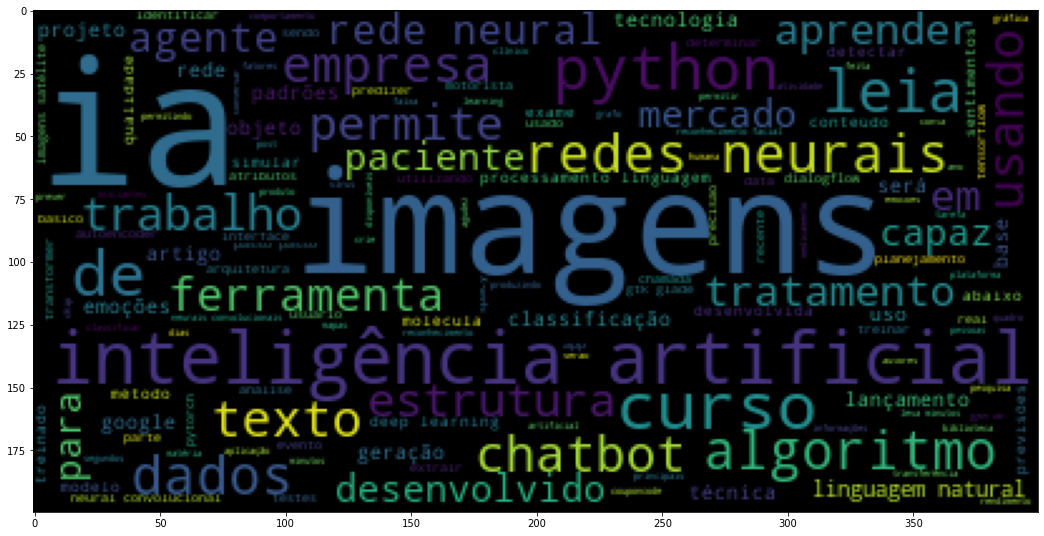

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize = (18,10))
plt.imshow(WordCloud().generate(textos_string));

### Pesquisa nos posts

In [ ]:
string = 'lançamento formação prática deep learning e tensorflow python crie passo a passo projetos utilizando modernas técnicas machine learning curso preço promocional lançamento'

In [ ]:
strings_busca = ['deep', 'python']
lista_tokens = [pln(item) for item in strings_busca]
lista_tokens

[deep, python]

In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, *lista_tokens)

In [ ]:
doc = pln(string)
matches = matcher(doc)
matches

[(8661325627334373315, 3, 4), (8661325627334373315, 7, 8)]

In [ ]:
doc[3:4], doc[7:8]

(deep, python)

In [ ]:
doc[3-2:4+2], doc[7-2:8+2]

(formação prática deep learning e, e tensorflow python crie passo)

In [ ]:
strings_busca = ['deep learning', 'python']
lista_tokens = [pln(item) for item in strings_busca]
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, *lista_tokens)
numero_palavras = 10

In [ ]:
search_strings_html = ' '.join([str(element) for element in strings_busca])
search_strings_html

'deep learning python'

In [ ]:
from IPython.core.display import HTML

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
for index, row in dataframe_posts.iterrows():
  #print(index, row)
  marked_text = ''
  doc = pln(row['message_pre'])
  id = row['id']
  matches = matcher(doc)
  if matches == []:
    continue
  
  display(HTML(f'<h2>{search_strings_html.upper()}</h2>'))
  display(HTML(f""" 
                <p>
                  <strong>ID:</strong>{id}</br>
                  <strong>Palavras encontradas</strong> {len(matches)}
                </p>
              """))
  for i in matches:
    #print(i)  
    start = i[1] - numero_palavras
    if start < 0:
      start = 0
    for j in range(len(lista_tokens)):
      if doc[i[1]:i[2]].similarity(lista_tokens[j]) == 1.0:
        search_text = str(lista_tokens[j])
        marked_text += str(doc[start:i[2] + numero_palavras]).replace(search_text, f"<mark>{search_text}</mark>")
        marked_text += "<br /><br />"
  display(HTML(f"""<blockquote>... {marked_text} ..."""))


### Agrupamento por data

In [ ]:
dataframe_posts.head(1)

,message,created_time,id,permalink_url,likes,message_pre
63,LANÇAMENTO! Formação Prática em Deep Learning e TensorFlow com Python! Crie passo a passo 16 pro...,2020-01-29T17:38:01+0000,228782997490446_1035374173497987,https://www.facebook.com/228782997490446/posts/1035374173497987/,81,lançamento formação prática deep learning e tensorflow python crie passo a passo projetos utiliz...


In [ ]:
dataframe_posts['created_time'] = pd.to_datetime(dataframe_posts['created_time'])

In [ ]:
posts_data = dataframe_posts.groupby(dataframe_posts['created_time'].dt.month).count()
posts_data

,message,created_time,id,permalink_url,likes,message_pre,created time
created_time,,,,,,,
1,34,34,34,34,34,34,34
2,32,32,32,32,32,32,32
3,28,28,28,28,28,28,28


In [ ]:
grafico = px.bar(posts_data, x = posts_data.index, y = 'message', title = 'Posts por meses')
grafico.show()

### Extração dos comentários

In [ ]:
lista_comentarios = []
for index, post in dataframe_posts.iterrows():
  #print(index, post)
  comentarios = graph.get_connections(id=post['id'], connection_name='comments', include_hidden = True)
  #print(comentarios)
  if comentarios['data']:
    #print(comentarios)
    lista_comentarios.append(comentarios['data'][0]['message'])

In [ ]:
len(lista_comentarios)

42

In [ ]:
comentarios_df = pd.DataFrame(lista_comentarios, columns = ['texto'])
comentarios_df

,texto
0,"Poderia criar um curso sobre álgebra linear e estatística, voltado pro ramo de inteligência arti..."
1,Uma ótima idéia com 1 terabyte de memória da para ter nem faço ideia de quantos livros armazenad...
2,Carai....daqui uns dias eu vou pedir emprego na IA Experts....hahahahah
3,Bom dia Jones. Seria interessante incluir no curso como usar o pytorch xla e como configurar no ...
4,Mariana Kleina
5,👏👏🎖️
6,Sidivaldo Oliveira
7,Um fator importante hj em dia tem sido a disponibilidade de bolsas.. o cenário mudou bastante de...
8,Tentei me inscrever no site pra fazer o curso: inseri nome e e-mail e recebi e-mail de confirmaç...
9,eu sonhei com isso nessa madrugada


### Pré-processamento dos comentários

In [ ]:
comentarios_df['texto_pre'] = comentarios_df['texto'].apply(pre_processamento)
comentarios_df.head()

,texto,texto_pre
0,"Poderia criar um curso sobre álgebra linear e estatística, voltado pro ramo de inteligência arti...",poderia criar curso álgebra linear e estatística voltado pro ramo inteligência artificial
1,Uma ótima idéia com 1 terabyte de memória da para ter nem faço ideia de quantos livros armazenad...,ótima idéia terabyte memória ideia quantos livros armazenados tinham armazenar milhares livros e...
2,Carai....daqui uns dias eu vou pedir emprego na IA Experts....hahahahah,carai .... daqui dias vou pedir emprego ia experts .... hahahahah
3,Bom dia Jones. Seria interessante incluir no curso como usar o pytorch xla e como configurar no ...,dia jones interessante incluir curso o pytorch xla e configurar collab precisei e dor cabeça hehe
4,Mariana Kleina,mariana kleina


In [ ]:
def pre_processamento2(texto):
  documento = pln(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_)
  lista = ' '.join([str(elemento) for elemento in lista])
  return lista

In [ ]:
pre_processamento2('cuidar cuidado cuidando')

'cuidar cuidar cuidar'

In [ ]:
comentarios_df['texto_pre2'] = comentarios_df['texto_pre'].apply(pre_processamento2)
comentarios_df.head()

,texto,texto_pre,texto_pre2
0,"Poderia criar um curso sobre álgebra linear e estatística, voltado pro ramo de inteligência arti...",poderia criar curso álgebra linear e estatística voltado pro ramo inteligência artificial,poder criar cursar álgebra linear e estatístico voltar pro ramo inteligência artificial
1,Uma ótima idéia com 1 terabyte de memória da para ter nem faço ideia de quantos livros armazenad...,ótima idéia terabyte memória ideia quantos livros armazenados tinham armazenar milhares livros e...,ótima idéia terabyte memória idear quanto livro armazenar ter armazenar milhar livro e o ir prog...
2,Carai....daqui uns dias eu vou pedir emprego na IA Experts....hahahahah,carai .... daqui dias vou pedir emprego ia experts .... hahahahah,carai .... d aqui dia ir pedir empregar ir expert .... hahahahah
3,Bom dia Jones. Seria interessante incluir no curso como usar o pytorch xla e como configurar no ...,dia jones interessante incluir curso o pytorch xla e configurar collab precisei e dor cabeça hehe,dia jones interessante incluir cursar o pytorch xla e configurar collab precisar e dor cabeça hehe
4,Mariana Kleina,mariana kleina,mariano kleina


### Análise de sentimentos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
classificador = spacy.load('/content/drive/MyDrive/Cursos - recursos/Mineração e Análise de Dados do Facebook/modelo')
classificador

In [ ]:
comentarios_df['texto_pre2'][1]

'ótima idéia terabyte memória idear quanto livro armazenar ter armazenar milhar livro e o ir programar ensinar o escrever livro o conhecimento curso universitário existir mundo poder armazenar livro e i.a programar ensinar o constar livro humano e aperfeiçoar d poder professor conhecimento curso universitário mundo ser i.as futurar poder idéia bíblia baixar celular e vários tradução acrescentar baixar kb'

In [ ]:
previsao = classificador(comentarios_df['texto_pre2'][1])
previsao.cats

{'NEGATIVO': 0.03066367469727993, 'POSITIVO': 0.9857757687568665}

In [ ]:
comentarios_df['Sentimento'] = None
for i in range(0, len(comentarios_df)):
  sentimento = classificador(comentarios_df['texto_pre2'][i])
  if sentimento.cats['POSITIVO'] > sentimento.cats['NEGATIVO']:
    comentarios_df['Sentimento'][i] = 'Positivo'
  else:
    comentarios_df['Sentimento'][i] = 'Negativo'

In [ ]:
comentarios_df

,texto,texto_pre,texto_pre2,Sentimento
0,"Poderia criar um curso sobre álgebra linear e estatística, voltado pro ramo de inteligência arti...",poderia criar curso álgebra linear e estatística voltado pro ramo inteligência artificial,poder criar cursar álgebra linear e estatístico voltar pro ramo inteligência artificial,Positivo
1,Uma ótima idéia com 1 terabyte de memória da para ter nem faço ideia de quantos livros armazenad...,ótima idéia terabyte memória ideia quantos livros armazenados tinham armazenar milhares livros e...,ótima idéia terabyte memória idear quanto livro armazenar ter armazenar milhar livro e o ir prog...,Positivo
2,Carai....daqui uns dias eu vou pedir emprego na IA Experts....hahahahah,carai .... daqui dias vou pedir emprego ia experts .... hahahahah,carai .... d aqui dia ir pedir empregar ir expert .... hahahahah,Positivo
3,Bom dia Jones. Seria interessante incluir no curso como usar o pytorch xla e como configurar no ...,dia jones interessante incluir curso o pytorch xla e configurar collab precisei e dor cabeça hehe,dia jones interessante incluir cursar o pytorch xla e configurar collab precisar e dor cabeça hehe,Positivo
4,Mariana Kleina,mariana kleina,mariano kleina,Positivo
5,👏👏🎖️,👏 👏 🎖 ️,👏 👏 🎖 ️,Positivo
6,Sidivaldo Oliveira,sidivaldo oliveira,sidivaldo oliveira,Positivo
7,Um fator importante hj em dia tem sido a disponibilidade de bolsas.. o cenário mudou bastante de...,fator importante hj dia sido a disponibilidade bolsas .. o cenário mudou o ano .. o ms academico...,fator importante hj dia ser o disponibilidade bolsar .. o cenário mudar o ano .. o ms academico ...,Positivo
8,Tentei me inscrever no site pra fazer o curso: inseri nome e e-mail e recebi e-mail de confirmaç...,inscrever site pra o curso inseri nome e e-mail e recebi e-mail confirmação direciona página reg...,inscrever site pra o cursar inserir nome e e-mail e receber e-mail confirmação direciona página ...,Positivo
9,eu sonhei com isso nessa madrugada,sonhei n madrugada,sonhar n madrugar,Negativo


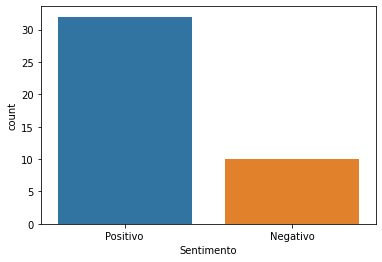

In [ ]:
import seaborn as sns
sns.countplot(comentarios_df['Sentimento']);